# Part I - Data Exploration and Basic EDA

This is the first notebook of the capstone project. It outlines detailed steps to familiarize LinkedIn Job Postings dataset from 2023. Here, we will go over the data quality issues through various data cleaning methods and highlight any notable observations regarding data processing. Then, the basic Exploratory Data Analysis (EDA) is performed to showcase potential relationships between different job attributes and `views`, our target variable. 

**Author: JJ Park**

**Date: 28/02/2024**

## LinkedIn Job Postings 2023

### Question of Interest
How can we leverage the job postings data from LinkedIn to add significant value to both companies and job applicants? Here, we will tackle the `views` column by conducting preliminary EDA to find relationships between different variables within the dataset. 

- Company: what are the key features in a job posting that recruiters should emphasize to raise the number of views and attract more talents?
- Applicant: can we assess the latest job trends by analyzing job postings with high views to boost the chances of getting hired?

### Dataset

Dataset has been sourced from: https://www.kaggle.com/datasets/arshkon/linkedin-job-postings/data. 

<a id= 'table' ></a>
### Table of Contents

1. [Data Dictionary](#Dictionary)  
2. [Data Loading](#Load)
3. [Data Cleaning - Datatypes](#Datatypes)
4. [Data Cleaning - Duplicates](#Duplicates)
5. [Data Cleaning - Null Values](#Null)
6. [Basic EDA - Visualizing Patterns](#EDA)
7. [Summary](#Summary)

<a id = 'Dictionary'><a/>   
## Data Dictionary
    
---

The data dictionary outlines all the variables from the `job_postings.csv` dataset. The descriptions of each variable are directly sourced from the author's Github: https://github.com/ArshKA/LinkedIn-Job-Scraper/blob/master/DatabaseStructure.md.

1. `job_id`: The job ID as defined by LinkedIn (https://www.linkedin.com/jobs/view/{ job_id })
2. `company_id`: Identifier for the company associated with the job posting (maps to companies.csv)
3. `title`: Job title
4. `description`: Job description
5. `max_salary`: Maximum salary
6. `med_salary`: Median salary
7. `min_salary`: Minimum salary
8. `pay_period`: Pay period for salary (Hourly, Monthly, Yearly)
9. `formatted_work_type`: Type of work (Fulltime, Parttime, Contract)
10. `location`: Job location
11. `applies`: Number of applications that have been submitted
12. `original_listed_time`: Original time the job was listed
13. `remote_allowed`: Whether job permits remote work
14. `views`: Number of times the job posting has been viewed
15. `job_posting_url`: URL to the job posting on a platform
16. `application_url`: URL where applications can be submitted
17. `application_type`: Type of application process (offsite, complex/simple onsite)
18. `expiry`: Expiration date or time for the job listing
19. `closed_time`: Time to close job listing
20. `formatted_experience_level`: Job experience level (entry, associate, executive, etc)
21. `skills_desc`: Description detailing required skills for job
22. `listed_time`: Time when the job was listed
23. `posting_domain`: Domain of the website with application
24. `sponsored`: Whether the job listing is sponsored or promoted
25. `work_type`: Type of work associated with the job
26. `currency`: Currency in which the salary is provided
27. `compensation_type`: Type of compensation for the job
28. `scraped`: Has been scraped by `details_retriever`

<a id = 'Load'><a/>   
## Data Loading
    
---

In this section, we will first load the LinkedIn dataset, then explore the dataset by checking the first and last few rows to improve our understanding.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
raw_df = pd.read_csv('../Data/job_postings.csv')

# Display all the columns, avoiding truncated column names
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

# Check the first few rows
raw_df.head()

job_id  company_id                                              title  \
0  3757940104    553718.0                              Hearing Care Provider   
1  3757940025   2192142.0  Shipping & Receiving Associate 2nd shift (Beav...   
2  3757938019    474443.0                               Manager, Engineering   
3  3757938018  18213359.0                                               Cook   
4  3757937095    437225.0        Principal Cloud Security Architect (Remote)   

                                         description  max_salary  med_salary  \
0  Overview\n\nHearingLife is a national hearing ...         NaN     5250.00   
1  Metalcraft of Mayville\nMetalcraft of Mayville...         NaN         NaN   
2  \nThe TSUBAKI name is synonymous with excellen...         NaN         NaN   
3  descriptionTitle\n\n Looking for a great oppor...         NaN       22.27   
4  Job Summary\nAt iHerb, we are on a mission to ...    275834.0         NaN   

   min_salary pay_period formatted_work_type          location  applies  \
0         NaN    MONTHLY           Full-time  Little River, SC      NaN   
1         NaN        NaN           Full-time    Beaver Dam, WI      NaN   
2         NaN        NaN           Full-time      Bessemer, AL      NaN   
3         NaN     HOURLY           Full-time   Aliso Viejo, CA      NaN   
4    205956.0     YEARLY           Full-time     United States      NaN   

   original_listed_time  remote_allowed  views  \
0          1.699090e+12             NaN    9.0   
1          1.699080e+12             NaN    NaN   
2          1.699080e+12             NaN    NaN   
3          1.699080e+12             NaN    1.0   
4          1.698970e+12             1.0    NaN   

                                     job_posting_url  \
0  https://www.linkedin.com/jobs/view/3757940104/...   
1  https://www.linkedin.com/jobs/view/3757940025/...   
2  https://www.linkedin.com/jobs/view/3757938019/...   
3  https://www.linkedin.com/jobs/view/3757938018/...   
4  https://www.linkedin.com/jobs/view/3757937095/...   

                                     application_url application_type  \
0  https://careers-demant.icims.com/jobs/19601/he...     OffsiteApply   
1  https://www.click2apply.net/mXLQz5S5NEYEXsKjwH...     OffsiteApply   
2  https://www.click2apply.net/LwbOykH2yAJdahB5Ah...     OffsiteApply   
3  https://jobs.apploi.com/view/854782?utm_campai...     OffsiteApply   
4  https://careers.iherb.com/global/en/job/IHINGL...     OffsiteApply   

         expiry  closed_time formatted_experience_level  \
0  1.701680e+12          NaN                Entry level   
1  1.701680e+12          NaN                        NaN   
2  1.701680e+12          NaN                        NaN   
3  1.701680e+12          NaN                Entry level   
4  1.701680e+12          NaN           Mid-Senior level   

                                         skills_desc   listed_time  \
0                                                NaN  1.699090e+12   
1                                                NaN  1.699080e+12   
2  Bachelor's Degree in Mechanical Engineering pr...  1.699080e+12   
3                                                NaN  1.699080e+12   
4                                                NaN  1.699090e+12   

             posting_domain  sponsored  work_type currency compensation_type  \
0  careers-demant.icims.com          0  FULL_TIME      USD       BASE_SALARY   
1       www.click2apply.net          0  FULL_TIME      NaN               NaN   
2       www.click2apply.net          0  FULL_TIME      NaN               NaN   
3           jobs.apploi.com          0  FULL_TIME      USD       BASE_SALARY   
4         careers.iherb.com          0  FULL_TIME      USD       BASE_SALARY   

      scraped  
0  1699138101  
1  1699085420  
2  1699085644  
3  1699087461  
4  1699085346

In [3]:
# Check the last few rows
raw_df.tail()

job_id  company_id                            title  \
33241  133114754  77766802.0                    Sales Manager   
33242  108965123         NaN  Office Administrative Assistant   
33243  102339515  52132271.0                  Franchise Owner   
33244   85008768         NaN         Licensed Insurance Agent   
33245    3958427    630152.0                 Stylist/ Clorist   

                                             description  max_salary  \
33241  Are you a dynamic and creative marketing profe...         NaN   
33242  A fast-fashion wholesaler, is looking for a fu...         NaN   
33243  DuctVentz is a dryer and A/C â€“ heat vent clean...         NaN   
33244  While many industries were hurt by the last fe...     52000.0   
33245  Karen Marie is looking for an awesome experien...     80000.0   

       med_salary  min_salary pay_period formatted_work_type  \
33241         NaN         NaN        NaN           Full-time   
33242         NaN         NaN        NaN           Full-time   
33243         NaN         NaN        NaN           Full-time   
33244         NaN     45760.0     YEARLY           Full-time   
33245         NaN     35000.0     YEARLY           Full-time   

                location  applies  original_listed_time  remote_allowed  \
33241  Santa Clarita, CA      NaN          1.692830e+12             NaN   
33242       New York, NY      2.0          1.699040e+12             NaN   
33243     Greater Boston      NaN          1.699050e+12             NaN   
33244          Chico, CA      NaN          1.692750e+12             NaN   
33245        Chicago, IL      NaN          1.699050e+12             NaN   

       views                                    job_posting_url  \
33241    NaN  https://www.linkedin.com/jobs/view/133114754/?...   
33242    4.0  https://www.linkedin.com/jobs/view/108965123/?...   
33243    NaN  https://www.linkedin.com/jobs/view/102339515/?...   
33244    5.0  https://www.linkedin.com/jobs/view/85008768/?t...   
33245    7.0  https://www.linkedin.com/jobs/view/3958427/?tr...   

      application_url    application_type        expiry  closed_time  \
33241             NaN  ComplexOnsiteApply  1.695430e+12          NaN   
33242             NaN  ComplexOnsiteApply  1.701630e+12          NaN   
33243             NaN   SimpleOnsiteApply  1.701640e+12          NaN   
33244             NaN  ComplexOnsiteApply  1.708300e+12          NaN   
33245             NaN  ComplexOnsiteApply  1.714600e+12          NaN   

      formatted_experience_level  \
33241                        NaN   
33242                        NaN   
33243                        NaN   
33244                        NaN   
33245                        NaN   

                                             skills_desc   listed_time  \
33241                                                NaN  1.692830e+12   
33242                                                NaN  1.699040e+12   
33243                                                NaN  1.699050e+12   
33244                                                NaN  1.692750e+12   
33245  Must be a seasoned stylist with an existing bo...  1.699050e+12   

      posting_domain  sponsored  work_type currency compensation_type  \
33241            NaN          0  FULL_TIME      NaN               NaN   
33242            NaN          0  FULL_TIME      NaN               NaN   
33243            NaN          0  FULL_TIME      NaN               NaN   
33244            NaN          1  FULL_TIME      USD       BASE_SALARY   
33245            NaN          0  FULL_TIME      USD       BASE_SALARY   

          scraped  
33241           1  
33242  1699044401  
33243  1699063495  
33244           1  
33245  1699057868

In [4]:
# Check the sample (size of 50) rows
raw_df.sample(50)

job_id  company_id  \
7012   3757456701   1945473.0   
27990  3693588071     62219.0   
192    3757919225   2031248.0   
2950   3757724554    737554.0   
9084   3756145990     19180.0   
25775  3696355954  34771768.0   
27858  3693589295      1103.0   
27087  3694102954         NaN   
12211  3755583611  16182319.0   
15314  3749354293  22309011.0   
18379  3701322194     31065.0   
6807   3757459158     59084.0   
2424   3757732830   1128772.0   
20647  3700548351    808034.0   
13429  3755148311         NaN   
6164   3757466695  71228931.0   
12460  3755581177     90639.0   
6203   3757466337   5071501.0   
2790   3757727889   2563298.0   
19661  3701304933   3570660.0   
18872  3701316736  68617019.0   
606    3757906681    165944.0   
25218  3697358369   1557409.0   
23860  3697390746   3308308.0   
9276   3756133094         NaN   
5137   3757485777   3706049.0   
19446  3701308756   1283277.0   
23899  3697390048      4898.0   
30801  3693052301   4822542.0   
2466   3757732391      4713.0   
16686  3749343763   2680000.0   
3324   3757706950     11115.0   
25136  3697360460      8019.0   
30663  3693053331    366025.0   
21758  3699099940    166551.0   
14542  3749375700  18506580.0   
15760  3749350184         NaN   
27810  3693590234    392569.0   
1254   3757750838  81938251.0   
21005  3699423203     88016.0   
10654  3756103459      6913.0   
18856  3701316883   2396310.0   
12802  3755576955   1809549.0   
21700  3699402441     45603.0   
1473   3757745607    146075.0   
30999  3693051427   1267571.0   
1962   3757738087     10141.0   
28004  3693588023   1286891.0   
18678  3701318646      3140.0   
12257  3755583164  11243687.0   

                                                   title  \
7012                                         Med/Surg RN   
27990                        Software Engineer (SE-2301)   
192                                Registered Nurse - RN   
2950   Transfer Coordinator/Care Liaison, System Admi...   
9084   Branch Service Supervisor or BSS Senior - West...   
25775                                        Tax Manager   
27858                             Retail Sales Associate   
27087                                             Writer   
12211                Dietary Cook - Full-Time All Shifts   
15314               Ophthalmic Scribe - Eye Clinic of MI   
18379  General Superintendent, Mission Critical - Tra...   
6807           Senior Scientist, Ex Vivo Tissue Modeling   
2424                                     Admin Assistant   
20647  Permanent Staff Acute Care Float RN job in Sen...   
13429                        Accounts Payable Specialist   
6164                   Director, Search Engine Marketing   
12460                             Senior Project Manager   
6203                    Director of Business Development   
2790       Software Developer (Algorithm Implementation)   
19661                    Sales Director [Owner/Operator]   
18872        Information Technology Help Desk Technician   
606      Bilingual Customer Service Specialist (Spanish)   
25218             Associate Network Construction Manager   
23860                            Propulsion Test Manager   
9276                        Hygienist for perio practice   
5137                     Registered Nurse - RN - LTC/SNF   
19446                      Clinical Specialist - Florida   
23899  Construction Project Manager - FAA Experience ...   
30801                        Wholesale Account Executive   
2466                            Territory Representative   
16686  Frontend / UI Developer (Angular, Typescript, ...   
3324                    Healthcare Facets Lead Developer   
25136  Managing Director - Washington DC Health Practice   
30663  Manager, Workforce Technologies - Capital Tech...   
21758                  LOCAL CDLA Feed Haul Truck Driver   
14542  Travel Nurse RN - ED - Emergency Department - ...   
15760                           Financial Representative   
27810  Publisher, Local Marketing Specialist & 

Let's check the number of rows and columns in the dataset.

In [5]:
raw_df.shape

(33246, 28)

From the initial observation, we can report the following:
- Several NaN (missing) values across different columns
- Presence of irrelevant columns (i.e. "job_posting_url", "application_url", and "scraped")
- Presence of dummy variables (binary columns)
- Data entries from time-related variables must be reformatted into a standard datetime format
- Columns, "Formatted_Work_Type" and "Work_Type" display identical information
- Two categorical variables, "Currency" and "Compensation_Type" require further investigation as they seem to have only one type of data entry. 

Now let's check the data types:

In [6]:
# Sanity Check
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  32592 non-null  float64
 2   title                       33246 non-null  object 
 3   description                 33245 non-null  object 
 4   max_salary                  11111 non-null  float64
 5   med_salary                  2241 non-null   float64
 6   min_salary                  11111 non-null  float64
 7   pay_period                  13352 non-null  object 
 8   formatted_work_type         33246 non-null  object 
 9   location                    33246 non-null  object 
 10  applies                     16238 non-null  float64
 11  original_listed_time        33246 non-null  float64
 12  remote_allowed              4802 non-null   float64
 13  views                       258

Next we will go over each of the time variable in the dataset ("original_listed_time", "expiry", "closed_time", and "listed_time"), and convert the data entries into a standard datetime format (Year-Month-Date, Hour-Minute_Second).

### Dealing with Time Variables

In [11]:
# Check the unique values of 'original_listed_time' column
raw_df['original_listed_time'].value_counts()

original_listed_time
1.699050e+12    5005
1.699040e+12    4958
1.692740e+12    3798
1.692730e+12    3407
1.698970e+12    2398
1.692750e+12    1578
1.692830e+12    1536
1.692660e+12    1365
1.699060e+12     993
1.699070e+12     908
1.692840e+12     854
1.692850e+12     726
1.692820e+12     685
1.698960e+12     654
1.698880e+12     325
1.696890e+12     314
1.699080e+12     308
1.690580e+12     219
1.692860e+12     206
1.699030e+12     203
1.692680e+12     196
1.696880e+12     166
1.692580e+12     155
1.690690e+12     109
1.690670e+12     100
1.696910e+12      96
1.692870e+12      96
1.698790e+12      85
1.698780e+12      76
1.692640e+12      73
1.692720e+12      69
1.696800e+12      62
1.698770e+12      61
1.691690e+12      57
1.696870e+12      52
1.690570e+12      51
1.691700e+12      46
1.699020e+12      41
1.696900e+12      37
1.698760e+12      36
1.690660e+12      35
1.698800e+12      31
1.692140e+12      31
1.690520e+12      30
1.698950e+12      30
1.692230e+12      29
1.691710e+12 

In [12]:
# Check the unique values of 'expiry' column
raw_df['expiry'].value_counts()

expiry
1.701640e+12    6978
1.695330e+12    4043
1.701630e+12    3671
1.695420e+12    2716
1.695340e+12    2527
1.701650e+12    1746
1.695320e+12    1717
1.695440e+12    1360
1.701660e+12    1175
1.701560e+12    1161
1.701670e+12    1042
1.695430e+12     819
1.695450e+12     458
1.714590e+12     358
1.708290e+12     319
1.714600e+12     250
1.708280e+12     215
1.708390e+12     174
1.695280e+12     169
1.695460e+12     156
1.714610e+12     122
1.708380e+12     114
1.695270e+12     111
1.708300e+12     108
1.701680e+12      87
1.695350e+12      86
1.695400e+12      85
1.695360e+12      83
1.695410e+12      67
1.695240e+12      60
1.701540e+12      54
1.701620e+12      52
1.708400e+12      49
1.701690e+12      48
1.714330e+12      48
1.701550e+12      47
1.714340e+12      44
1.714520e+12      42
1.695390e+12      40
1.697920e+12      38
1.708410e+12      37
1.701580e+12      35
1.714630e+12      33
1.700250e+12      33
1.707250e+12      32
1.701380e+12      30
1.714320e+12      29
1.7072

In [13]:
# Check the unique values of 'closed_time' column
raw_df['closed_time'].value_counts()

closed_time
1.690000e+12    928
1.700000e+12    244
Name: count, dtype: int64

In [14]:
# Check the unique values of 'listed_time' column
raw_df['listed_time'].value_counts()

listed_time
1.699050e+12    6910
1.699040e+12    5465
1.692740e+12    4550
1.692730e+12    3189
1.692830e+12    2561
1.692850e+12    1389
1.699070e+12    1328
1.692750e+12    1216
1.699060e+12    1138
1.692840e+12     947
1.698960e+12     795
1.692820e+12     686
1.699080e+12     643
1.698970e+12     464
1.692860e+12     300
1.692680e+12     286
1.692760e+12     123
1.692870e+12     121
1.692810e+12      99
1.692640e+12      86
1.699030e+12      81
1.699090e+12      74
1.698780e+12      73
1.698790e+12      69
1.692800e+12      68
1.698770e+12      48
1.698950e+12      47
1.692770e+12      40
1.691700e+12      39
1.691690e+12      38
1.698760e+12      37
1.699100e+12      37
1.699020e+12      35
1.698990e+12      29
1.692720e+12      28
1.692790e+12      25
1.692660e+12      20
1.691680e+12      19
1.699010e+12      16
1.699120e+12      16
1.692780e+12      15
1.698940e+12      14
1.692630e+12       8
1.699130e+12       7
1.698750e+12       7
1.698800e+12       7
1.699110e+12       7
1

After checking the unique values from each of the time variable, we can spot a pattern where the time values are listed in a scientific timestamp format (i.e. 1.692000e+12). Hence, we will convert this to a standard datetime format (Source: https://www.scaler.com/topics/python-timestamp-to-datetime/).

#### Original_Listed_Time

In [15]:
# Convert scientific notation to standard notation (float)
raw_df['original_listed_time']=raw_df['original_listed_time'].astype('float64')

In [16]:
# Convert milliseconds to seconds 
raw_df['original_listed_time']=raw_df['original_listed_time']/1000

In [17]:
# Convert timestamp into datetime 
from datetime import datetime
raw_df['original_listed_time'] = raw_df['original_listed_time'].apply(lambda x: datetime.fromtimestamp(x))
raw_df['original_listed_time']

0       2023-11-04 05:26:40
1       2023-11-04 02:40:00
2       2023-11-04 02:40:00
3       2023-11-04 02:40:00
4       2023-11-02 20:06:40
                ...        
33241   2023-08-23 18:33:20
33242   2023-11-03 15:33:20
33243   2023-11-03 18:20:00
33244   2023-08-22 20:20:00
33245   2023-11-03 18:20:00
Name: original_listed_time, Length: 33246, dtype: datetime64[ns]

In [18]:
# Sanity Check
raw_df.head()

job_id  company_id                                              title  \
0  3757940104    553718.0                              Hearing Care Provider   
1  3757940025   2192142.0  Shipping & Receiving Associate 2nd shift (Beav...   
2  3757938019    474443.0                               Manager, Engineering   
3  3757938018  18213359.0                                               Cook   
4  3757937095    437225.0        Principal Cloud Security Architect (Remote)   

                                         description  max_salary  med_salary  \
0  Overview\n\nHearingLife is a national hearing ...         NaN     5250.00   
1  Metalcraft of Mayville\nMetalcraft of Mayville...         NaN         NaN   
2  \nThe TSUBAKI name is synonymous with excellen...         NaN         NaN   
3  descriptionTitle\n\n Looking for a great oppor...         NaN       22.27   
4  Job Summary\nAt iHerb, we are on a mission to ...    275834.0         NaN   

   min_salary pay_period formatted_work_type          location  applies  \
0         NaN    MONTHLY           Full-time  Little River, SC      NaN   
1         NaN        NaN           Full-time    Beaver Dam, WI      NaN   
2         NaN        NaN           Full-time      Bessemer, AL      NaN   
3         NaN     HOURLY           Full-time   Aliso Viejo, CA      NaN   
4    205956.0     YEARLY           Full-time     United States      NaN   

  original_listed_time  remote_allowed  views  \
0  2023-11-04 05:26:40             NaN    9.0   
1  2023-11-04 02:40:00             NaN    NaN   
2  2023-11-04 02:40:00             NaN    NaN   
3  2023-11-04 02:40:00             NaN    1.0   
4  2023-11-02 20:06:40             1.0    NaN   

                                     job_posting_url  \
0  https://www.linkedin.com/jobs/view/3757940104/...   
1  https://www.linkedin.com/jobs/view/3757940025/...   
2  https://www.linkedin.com/jobs/view/3757938019/...   
3  https://www.linkedin.com/jobs/view/3757938018/...   
4  https://www.linkedin.com/jobs/view/3757937095/...   

                                     application_url application_type  \
0  https://careers-demant.icims.com/jobs/19601/he...     OffsiteApply   
1  https://www.click2apply.net/mXLQz5S5NEYEXsKjwH...     OffsiteApply   
2  https://www.click2apply.net/LwbOykH2yAJdahB5Ah...     OffsiteApply   
3  https://jobs.apploi.com/view/854782?utm_campai...     OffsiteApply   
4  https://careers.iherb.com/global/en/job/IHINGL...     OffsiteApply   

         expiry  closed_time formatted_experience_level  \
0  1.701680e+12          NaN                Entry level   
1  1.701680e+12          NaN                        NaN   
2  1.701680e+12          NaN                        NaN   
3  1.701680e+12          NaN                Entry level   
4  1.701680e+12          NaN           Mid-Senior level   

                                         skills_desc   listed_time  \
0                                                NaN  1.699090e+12   
1                                                NaN  1.699080e+12   
2  Bachelor's Degree in Mechanical Engineering pr...  1.699080e+12   
3                                                NaN  1.699080e+12   
4                                                NaN  1.699090e+12   

             posting_domain  sponsored  work_type currency compensation_type  \
0  careers-demant.icims.com          0  FULL_TIME      USD       BASE_SALARY   
1       www.click2apply.net          0  FULL_TIME      NaN               NaN   
2       www.click2apply.net          0  FULL_TIME      NaN               NaN   
3           jobs.apploi.com          0  FULL_TIME      USD       BASE_SALARY   
4         careers.iherb.com          0  FULL_TIME      USD       BASE_SALARY   

      scraped  
0  1699138101  
1  1699085420  
2  1699085644  
3  1699087461  
4  1699085346

From above, we can observe that the data entries from `original_listed_time` have been transformed into datetime format. We will repeat this process for the remaining three columns.

#### Expiry

In [19]:
# Convert scientific notation to standard notation (float)
raw_df['expiry']=raw_df['expiry'].astype('float64')

In [20]:
# Convert milliseconds to seconds 
raw_df['expiry']=raw_df['expiry']/1000

In [21]:
# Convert timestamp into datetime 
from datetime import datetime
raw_df['expiry'] = raw_df['expiry'].apply(lambda x: datetime.fromtimestamp(x))
raw_df['expiry']

0       2023-12-04 03:53:20
1       2023-12-04 03:53:20
2       2023-12-04 03:53:20
3       2023-12-04 03:53:20
4       2023-12-04 03:53:20
                ...        
33241   2023-09-22 20:46:40
33242   2023-12-03 14:00:00
33243   2023-12-03 16:46:40
33244   2024-02-18 18:46:40
33245   2024-05-01 17:46:40
Name: expiry, Length: 33246, dtype: datetime64[ns]

In [22]:
# Sanity Check
raw_df.head()

job_id  company_id                                              title  \
0  3757940104    553718.0                              Hearing Care Provider   
1  3757940025   2192142.0  Shipping & Receiving Associate 2nd shift (Beav...   
2  3757938019    474443.0                               Manager, Engineering   
3  3757938018  18213359.0                                               Cook   
4  3757937095    437225.0        Principal Cloud Security Architect (Remote)   

                                         description  max_salary  med_salary  \
0  Overview\n\nHearingLife is a national hearing ...         NaN     5250.00   
1  Metalcraft of Mayville\nMetalcraft of Mayville...         NaN         NaN   
2  \nThe TSUBAKI name is synonymous with excellen...         NaN         NaN   
3  descriptionTitle\n\n Looking for a great oppor...         NaN       22.27   
4  Job Summary\nAt iHerb, we are on a mission to ...    275834.0         NaN   

   min_salary pay_period formatted_work_type          location  applies  \
0         NaN    MONTHLY           Full-time  Little River, SC      NaN   
1         NaN        NaN           Full-time    Beaver Dam, WI      NaN   
2         NaN        NaN           Full-time      Bessemer, AL      NaN   
3         NaN     HOURLY           Full-time   Aliso Viejo, CA      NaN   
4    205956.0     YEARLY           Full-time     United States      NaN   

  original_listed_time  remote_allowed  views  \
0  2023-11-04 05:26:40             NaN    9.0   
1  2023-11-04 02:40:00             NaN    NaN   
2  2023-11-04 02:40:00             NaN    NaN   
3  2023-11-04 02:40:00             NaN    1.0   
4  2023-11-02 20:06:40             1.0    NaN   

                                     job_posting_url  \
0  https://www.linkedin.com/jobs/view/3757940104/...   
1  https://www.linkedin.com/jobs/view/3757940025/...   
2  https://www.linkedin.com/jobs/view/3757938019/...   
3  https://www.linkedin.com/jobs/view/3757938018/...   
4  https://www.linkedin.com/jobs/view/3757937095/...   

                                     application_url application_type  \
0  https://careers-demant.icims.com/jobs/19601/he...     OffsiteApply   
1  https://www.click2apply.net/mXLQz5S5NEYEXsKjwH...     OffsiteApply   
2  https://www.click2apply.net/LwbOykH2yAJdahB5Ah...     OffsiteApply   
3  https://jobs.apploi.com/view/854782?utm_campai...     OffsiteApply   
4  https://careers.iherb.com/global/en/job/IHINGL...     OffsiteApply   

               expiry  closed_time formatted_experience_level  \
0 2023-12-04 03:53:20          NaN                Entry level   
1 2023-12-04 03:53:20          NaN                        NaN   
2 2023-12-04 03:53:20          NaN                        NaN   
3 2023-12-04 03:53:20          NaN                Entry level   
4 2023-12-04 03:53:20          NaN           Mid-Senior level   

                                         skills_desc   listed_time  \
0                                                NaN  1.699090e+12   
1                                                NaN  1.699080e+12   
2  Bachelor's Degree in Mechanical Engineering pr...  1.699080e+12   
3                                                NaN  1.699080e+12   
4                                                NaN  1.699090e+12   

             posting_domain  sponsored  work_type currency compensation_type  \
0  careers-demant.icims.com          0  FULL_TIME      USD       BASE_SALARY   
1       www.click2apply.net          0  FULL_TIME      NaN               NaN   
2       www.click2apply.net          0  FULL_TIME      NaN               NaN   
3           jobs.apploi.com          0  FULL_TIME      USD       BASE_SALARY   
4         careers.iherb.com          0  FULL_TIME      USD       BASE_SALARY   

      scraped  
0  1699138101  
1  1699085420  
2  1699085644  
3  1699087461  
4  1699085346

#### Closed_Time

In [23]:
# Convert scientific notation to standard notation (float)
raw_df['closed_time']=raw_df['closed_time'].astype('float64')

In [24]:
# Convert milliseconds to seconds 
raw_df['closed_time']=raw_df['closed_time']/1000

Since there are NaN (missing) values in `closed_time` column, we first have to filter these null values to apply datetime function.

In [25]:
# Filter out NaN values
not_null_ct = raw_df['closed_time'].notnull()
raw_df.loc[not_null_ct, 'closed_time'] = raw_df.loc[not_null_ct, 'closed_time'].apply(lambda x: datetime.fromtimestamp(x))

# Print the updated DataFrame
print(raw_df['closed_time'])


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
33241    NaN
33242    NaN
33243    NaN
33244    NaN
33245    NaN
Name: closed_time, Length: 33246, dtype: object


/var/folders/5d/y_cf75vx4c9dxq1445qbw6pc0000gn/T/ipykernel_46404/971382252.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<DatetimeArray>
['2023-11-14 17:13:20', '2023-11-14 17:13:20', '2023-11-14 17:13:20',
 '2023-11-14 17:13:20', '2023-11-14 17:13:20', '2023-11-14 17:13:20',
 '2023-11-14 17:13:20', '2023-11-14 17:13:20', '2023-11-14 17:13:20',
 '2023-11-14 17:13:20',
 ...
 '2023-07-22 00:26:40', '2023-07-22 00:26:40', '2023-07-22 00:26:40',
 '2023-07-22 00:26:40', '2023-07-22 00:26:40', '2023-07-22 00:26:40',
 '2023-07-22 00:26:40', '2023-07-22 00:26:40', '2023-07-22 00:26:40',
 '2023-07-22 00:26:40']
Length: 1172, dtype: datetime64[ns]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  raw_df.loc[not_null_ct, 'closed_time'] = raw_df.loc[not_null_ct, 'closed_time'].apply(lambda x: datetime.fromtimestamp(x))


In [26]:
raw_df.sample(50)

job_id  company_id  \
30973  3693051492   9901130.0   
23004  3699059188      3264.0   
22663  3699079632   1104193.0   
17583  3701369569     10667.0   
31764  3693048063     20489.0   
30335  3693057090    861806.0   
706    3757798169      2646.0   
10895  3755597062      3532.0   
10182  3756109953  10122698.0   
30266  3693058211   9328925.0   
32839  3693036850  96360915.0   
3064   3757721323   4854165.0   
13294  3755552601  40934666.0   
4749   3757489154      2622.0   
13954  3753086711   2548094.0   
30941  3693051619     30086.0   
25970  3694138574   1110268.0   
16792  3749339882    204715.0   
16481  3749345617  11170816.0   
508    3757910822  80862575.0   
21274  3699413328  27249903.0   
15509  3749352178  13323120.0   
9978   3756112015      9479.0   
24866  3697376675     49042.0   
15497  3749352224   2619961.0   
29820  3693066785  74971597.0   
31721  3693048258   9185109.0   
14667  3749372743  18506580.0   
170    3757920617  54350022.0   
14506  3749376018      8710.0   
17365  3701372792    163578.0   
23139  3699056999     34638.0   
12287  3755582914   1623211.0   
8376   3756900836     30225.0   
11020  3755595322    165697.0   
33007  3690830913  29037477.0   
23264  3699054769     77301.0   
14206  3749902530  28132450.0   
30537  3693054367   3757480.0   
7557   3757444982   2074994.0   
12856  3755576221     47040.0   
15419  3749352919      7795.0   
32841  3693035554  96654985.0   
657    3757902925    162677.0   
21350  3699411594  15451728.0   
23554  3697396174      3240.0   
19356  3701310242  79017472.0   
23617  3697395040      6215.0   
16309  3749346482     11056.0   
12732  3755577974  18312164.0   

                                                   title  \
30973                                   Business Analyst   
23004                Claims Adjuster Senior - Litigation   
22663                   Operations Student Intern (9025)   
17583           Marketing Insights Researcher - Business   
31764                              CRM Marketing Analyst   
30335                                             Busser   
706    (USA) Pharmacy Manager-$40,000 Sign On Bonus A...   
10895                          Financial Advisor - Omaha   
10182                                      Groundskeeper   
30266  Head of Product Management & Marketing - Fixed...   
32839                      Developer Internship [unpaid]   
3064                                 Technical Architect   
13294                           Sales Operations Manager   
4749                                    Business Manager   
13954                                Pharmacy Technician   
30941               Principal Escalation Engineer (NGFW)   
25970                                          Architect   
16792                           Sr. Full-Stack Engineer    
16481        Information Technology - Systems Analyst II   
508                   Radiologic Technologist Contingent   
21274                                Chief of Staff, CRO   
15509               Director, Human Resources Operations   
9978                            Trust Investment Officer   
24866                                      Waiter/Server   
15497     Industrial Production Manager (Group Director)   
29820                                   Assistant Editor   
31721                    Electrical Engineering Manager    
14667  Travel Nurse RN - CVICU - $2,016 per week - a0...   
170              Full Stack Developer - API Integrations   
14506  Enhanced Claim Resolution Operations, Senior A...   
17365                             Assoc Material Handler   
23139                           Plumbing Design Engineer   
12287                                 Proprietary Trader   
8376    Sr. Analyst - Treasury - Aramco Trading Americas   
11020            0046 - Concord CA - Sr Sales Specialist   
33007                                 Payroll Specialist   
23264                         Customer Service Associate   
14206                          Unit Secretary G

Through filtering the NaN values and applying the datetime function, the data entries are now in the proper datetime format.

#### Listed_Time

In [27]:
# Convert scientific notation to standard notation (float)
raw_df['listed_time']=raw_df['listed_time'].astype('float64')

In [28]:
# Convert milliseconds to seconds 
raw_df['listed_time']=raw_df['listed_time']/1000

In [29]:
# Convert timestamp into datetime 
from datetime import datetime
raw_df['listed_time'] = raw_df['listed_time'].apply(lambda x: datetime.fromtimestamp(x))
raw_df['listed_time']

0       2023-11-04 05:26:40
1       2023-11-04 02:40:00
2       2023-11-04 02:40:00
3       2023-11-04 02:40:00
4       2023-11-04 05:26:40
                ...        
33241   2023-08-23 18:33:20
33242   2023-11-03 15:33:20
33243   2023-11-03 18:20:00
33244   2023-08-22 20:20:00
33245   2023-11-03 18:20:00
Name: listed_time, Length: 33246, dtype: datetime64[ns]

In [30]:
raw_df.sample(50)

job_id  company_id  \
9122   3756143936  18860134.0   
20118  3701198915     43876.0   
1537   3757744197    120393.0   
30505  3693055044   2058906.0   
22000  3699087776         NaN   
21164  3699417040      5927.0   
32031  3693046819   8047188.0   
30151  3693062969     11056.0   
10374  3756107906     13074.0   
788    3757781464  28647688.0   
6038   3757468607  42747663.0   
11666  3755589149  89877420.0   
18546  3701320187     13151.0   
27269  3694101479     34616.0   
2368   3757733442     13499.0   
6596   3757461246  33439815.0   
22340  3699083526      2649.0   
28291  3693586358         NaN   
2583   3757731065  68648187.0   
6669   3757460751      7601.0   
4380   3757491960     18043.0   
30602  3693054087  13672385.0   
9260   3756133361    164860.0   
16839  3748849428     11056.0   
20068  3701199694   1902376.0   
4833   3757488479   3706049.0   
21415  3699409597  35506944.0   
7349   3757449563  75031276.0   
10707  3756101735     27020.0   
21600  3699404656     11674.0   
958    3757764810      1235.0   
25511  3697350876      1767.0   
13861  3753097119  18860134.0   
461    3757911884    163139.0   
9802   3756113457    162531.0   
22636  3699079941     88016.0   
5237   3757484801   3706049.0   
13591  3754859177   2297309.0   
16542  3749345334   1774799.0   
22457  3699082139      6176.0   
16549  3749345281  10868830.0   
19779  3701303028   3570660.0   
4413   3757491714     41266.0   
21917  3699089310    122659.0   
26579  3694112267      2562.0   
31549  3693048939      4787.0   
27807  3693590254      1103.0   
22284  3699084342      7361.0   
6259   3757465530  35505451.0   
11149  3755594313    164880.0   

                                                   title  \
9122                     Tax Manager - Cincinnati, OH! âœ…   
20118                       Pulp & Paper Project Manager   
1537   Business Solutions Associate (2024)- Poughkeep...   
30505        Inside Sales Representative (Event-Focused)   
22000                            Territory Sales Manager   
21164                     Deburr/Grind - 1st Shift - FLS   
32031           ServiceNow Solutions Architect - Only W2   
30151                                   Sr Data Engineer   
10374      ER Tech - Tacoma General Emergency Department   
788    Travel Registered Nurse - Rehab job available ...   
6038                                  Area Sales Manager   
11666   Modernization Displacement & Site Repair Manager   
18546                                Billing Coordinator   
27269                                 Lead Data Engineer   
2368                                     Finance Manager   
6596                              Elementary K-5 Teacher   
22340  Academic Advisor-Department of Mathematics, St...   
28291  Facilities and Equipment Maintenance Manager -...   
2583                           Backend Software Engineer   
6669          Senior Manager Technology  (Cybersecurity)   
4380                                           Recruiter   
30602                                  Jr. AWS Developer   
9260        CDL Ready Mix Truck Drivers - Lago Vista, TX   
16839                                    System Engineer   
20068  Business Development Manager for Single & Mult...   
4833    Registered Nurse - RN - Skilled Nursing Facility   
21415                          SUPERVISOR - SURVEILLANCE   
7349   Development Director | Utility Scale Wind, Sol...   
10707               Logistics Specialist (10414-2023618)   
21600   MAC Artist - Part Time - MAC Murray - Murray, UT   
958               Senior Premier Banker - NorthRidge, CA   
25511                     Derivative Operations, Officer   
13861                             Construction Estimator   
461                  Fiber Technician, Oklahoma City, OK   
9802                                 Industrial Designer   
22636  Registered Radiologic Assistant - Full Time Da...   
5237    Registered Nurse - RN - L&D - Labor and Delivery   
13591                           SOLAR Product

From the sample table above, we can see that all time variables have been converted into standard datetime format. In the standard notation, we can observe the following:
- `original_listed_time` and `listed_time` are displaying similar information, further investigation is needed.
- `closed_time` variable contains a lot of null values and the non-null values seem to be inconsistent as some timestamps occur prior to `original_listed_time` timestamps (closed_time: 2023-07-22, 00:26:40 vs original_listed_time: 2023-08-22, 17:33:20). We will conduct further analysis to determine the relevance of `closed_time` column and take actions accordingly. 

In [31]:
# Find rows with duplicate combinations of 'original_time_listed' and 'listed_time'
duplicate_rows = raw_df[raw_df.duplicated(subset=['original_listed_time', 'listed_time'], keep=False)]

# Group by the combination of 'original_time_listed' and 'listed_time' and count the occurrences
duplicate_counts = duplicate_rows.groupby(['original_listed_time', 'listed_time']).size().reset_index(name='count')

# Sum the counts to get the total duplicate count
total_duplicate_count = duplicate_counts['count'].sum()

print("Total duplicate count:", total_duplicate_count)

Total duplicate count: 32861


There are total 32861 duplicated rows (out of 33246 rows) between `original_listed_time` and `listed_time`. This leaves us with 385 unique values from `listed_time` column, and these values suggest that there are job postings that are being reposted. From these two columns, we can calculate the repost duration of each job posting. 

In [32]:
raw_df['repost_duration'] = raw_df['listed_time'] - raw_df['original_listed_time']

In [33]:
raw_df[['listed_time', 'original_listed_time', 'repost_duration']].sample(50)

listed_time original_listed_time  repost_duration
11379 2023-11-03 18:20:00  2023-11-02 20:06:40  0 days 22:13:20
2255  2023-11-03 18:20:00  2023-11-03 18:20:00  0 days 00:00:00
18861 2023-08-22 17:33:20  2023-08-21 19:20:00  0 days 22:13:20
20573 2023-08-22 00:53:20  2023-08-08 20:13:20 13 days 04:40:00
20909 2023-08-24 02:53:20  2023-08-24 02:53:20  0 days 00:00:00
9456  2023-11-03 21:06:40  2023-11-02 20:06:40  1 days 01:00:00
16947 2023-11-02 20:06:40  2023-11-02 20:06:40  0 days 00:00:00
18105 2023-08-22 17:33:20  2023-08-22 17:33:20  0 days 00:00:00
4732  2023-11-03 18:20:00  2023-11-03 18:20:00  0 days 00:00:00
6126  2023-11-03 15:33:20  2023-11-03 15:33:20  0 days 00:00:00
25503 2023-08-22 14:46:40  2023-08-22 14:46:40  0 days 00:00:00
24064 2023-08-22 20:20:00  2023-08-22 17:33:20  0 days 02:46:40
17629 2023-08-22 17:33:20  2023-08-22 17:33:20  0 days 00:00:00
27550 2023-08-23 21:20:00  2023-08-23 21:20:00  0 days 00:00:00
6152  2023-11-03 15:33:20  2023-11-03 15:33:20  0 days 00:00:00
19592 2023-08-22 14:46:40  2023-08-22 14:46:40  0 days 00:00:00
23925 2023-08-22 20:20:00  2023-08-22 17:33:20  0 days 02:46:40
5440  2023-11-03 15:33:20  2023-11-02 20:06:40  0 days 19:26:40
15377 2023-11-03 18:20:00  2023-11-02 20:06:40  0 days 22:13:20
14430 2023-11-03 18:20:00  2023-11-02 20:06:40  0 days 22:13:20
6703  2023-11-03 15:33:20  2023-11-03 15:33:20  0 days 00:00:00
31474 2023-08-22 14:46:40  2023-08-22 14:46:40  0 days 00:00:00
3441  2023-11-03 18:20:00  2023-11-03 18:20:00  0 days 00:00:00
9156  2023-11-03 23:53:20  2023-10-25 01:00:00  9 days 22:53:20
29357 2023-08-22 17:33:20  2023-08-22 17:33:20  0 days 00:00:00
18154 2023-08-22 17:33:20  2023-08-22 17:33:20  0 days 00:00:00
7365  2023-11-03 15:33:20  2023-11-03 15:33:20  0 days 00:00:00
17986 2023-08-23 13:00:00  2023-08-22 17:33:20  0 days 19:26:40
5365  2023-11-03 18:20:00  2023-11-03 18:20:00  0 days 00:00:00
25683 2023-08-22 14:46:40  2023-08-22 14:46:40  0 days 00:00:00
17762 2023-08-22 17:33:20  2023-08-22 17:33:20  0 days 00:00:00
28346 2023-08-23 15:46:40  2023-08-23 15:46:40  0 days 00:00:00
304   2023-11-03 23:53:20  2023-11-03 23:53:20  0 days 00:00:00
9417  2023-11-03 21:06:40  2023-11-03 21:06:40  0 days 00:00:00
12880 2023-11-03 15:33:20  2023-11-03 15:33:20  0 days 00:00:00
13252 2023-11-03 15:33:20  2023-10-09 15:33:20 25 days 00:00:00
8490  2023-11-02 17:20:00  2023-11-01 19:06:40  0 days 22:13:20
17752 2023-08-23 13:00:00  2023-08-22 17:33:20  0 days 19:26:40
5338  2023-11-03 18:20:00  2023-11-03 18:20:00  0 days 00:00:00
22612 2023-08-23 18:33:20  2023-08-22 20:20:00  0 days 22:13:20
7693  2023-11-03 15:33:20  2023-11-03 15:33:20  0 days 00:00:00
25816 2023-08-24 02:53:20  2023-08-24 02:53:20  0 days 00:00:00
26127 2023-08-24 00:06:40  2023-08-22 00:53:20  1 days 23:13:20
29630 2023-08-22 17:33:20  2023-08-22 17:33:20  0 days 00:00:00
23863 2023-08-22 20:20:00  2023-08-22 17:33:20  0 days 02:46:40
8468  2023-11-02 17:20:00  2023-11-02 17:20:00  0 days 00:00:00
14058 2023-11-04 05:26:40  2023-10-10 02:40:00 25 days 02:46:40
29124 2023-08-22 20:20:00  2023-08-22 20:20:00  0 days 00:00:00
25478 2023-08-23 15:46:40  2023-08-20 21:06:40  2 days 18:40:00
552   2023-11-03 23:53:20  2023-11-02 20:06:40  1 days 03:46:40

Using the information above, we will generate a binary column of whether the job posting has been reposted or not. The new `reposted` column will have two entries, 0 represents no reposts (repost_duration = 0 days 00:00:00), and 1 represents reposts (repost duration greater than 0 days 00:00:00). To achieve this, we will convert the repost duration column to a format where we can easily check if it's greater than zero. Then, we use a conditional statement to create the binary column.

In [34]:
# Convert repost_duration to seconds
raw_df['repost_duration_seconds'] = raw_df['repost_duration'].dt.total_seconds()

# Create binary column based on repost duration
raw_df['reposted'] = (raw_df['repost_duration_seconds'] > 0).astype(int)

# Drop the intermediate column if needed
raw_df.drop(columns=['repost_duration_seconds'], inplace=True)

# Display the DataFrame
raw_df.sample(50)

job_id  company_id  \
32384  3693045296     95267.0   
27253  3694101562    978382.0   
18378  3701322195      1680.0   
23954  3697389164   2430668.0   
2225   3757734970  72659858.0   
7735   3757436519   9881525.0   
28173  3693586956  22310425.0   
31955  3693047233    164708.0   
33207  2148434726     13074.0   
26276  3694117176   2203697.0   
31898  3693047492  16124699.0   
25538  3697349338     48024.0   
6237   3757465787   6648646.0   
2988   3757723760    318540.0   
4120   3757494107  71042760.0   
19903  3701301517  91172194.0   
18135  3701325864    490432.0   
1440   3757746254   5398043.0   
10974  3755596039   1125676.0   
31306  3693050008  14796450.0   
32476  3693044806   2474662.0   
15690  3749350516    890145.0   
27725  3693592119      1103.0   
14934  3749361768  10266947.0   
17053  3748840539      1028.0   
28409  3693584935      9089.0   
11233  3755593455    398606.0   
31525  3693049024      4097.0   
8654   3756383306     36704.0   
23122  3699057348     77301.0   
2431   3757732801    808034.0   
18420  3701321687      1906.0   
21143  3699417519      1703.0   
24312  3697384612     13033.0   
33158  3566610728         NaN   
30427  3693056054    484002.0   
17119  3748838936     57281.0   
15058  3749358672     20573.0   
1785   3757739979    461332.0   
13316  3755551794     15227.0   
26044  3694123207      1505.0   
25391  3697354863  56119363.0   
4543   3757490480     13946.0   
31448  3693049370    373568.0   
23351  3698003058    686294.0   
911    3757769875      1396.0   
21304  3699412829  64550438.0   
8614   3756724610      8070.0   
21508  3699407708      2251.0   
7597   3757443593      3240.0   

                                                   title  \
32384        Bookkeeper / Office Manager with QuickBooks   
27253              Relationship Banker - Bellevue Branch   
18378     Microsoft Search and Power Apps/Power Automate   
23954      Senior Manager, Cost Model Analytics - Hybrid   
2225                                  Accounting Manager   
7735                                  Equipment Operator   
28173                                   Staff Accountant   
31955                             Technical Site Manager   
33207                         Mental Health Professional   
26276          Workers Compensation Unit Stat Specialist   
31898             Real Estate Financial Analysis Manager   
25538                                        INSULATOR 9   
6237                                        Receptionist   
2988    Senior Clinical Biospecimen Operations Associate   
4120                                  Project Accountant   
19903                         Mechanical Project Manager   
18135                 Guidewire Billing Center Developer   
1440       Virtual Medical Receptionist/Office Assistant   
10974                             Restaurant Team Member   
31306                  Industrial Maintenance Technician   
32476      Remote Global Success Factors Project Manager   
15690                             Architectural Designer   
27725                             Retail Sales Associate   
14934                         Class A CDL Shuttle Driver   
17053      Technical Support Analyst - Database Security   
28409                               Data Project Manager   
11233                               Body Shop Technician   
31525                               Data Management Lead   
8654                                Electrical Estimator   
23122                                            Cashier   
2431   Travel ER RN job in Fullerton, CA - Make $2602...   
18420                         Program Finance Specialist   
21143                    Xfinity Retail Sales Consultant   
24312                           Associate Sales Engineer   
33158                                  Account Executive   
30427                                Application Manager   
17119                                     Chief Engineer   
15058             Admissions Nurse (Registered 

In [35]:
raw_df['reposted'].value_counts()

reposted
0    23377
1     9869
Name: count, dtype: int64

There were 23377 job postings that weren't reposted at all, whereas 9869 job postings were reposted at least once. Now we know whether the job postings have been reposted or not, we can remove the `repost_duration` column from the dataset.

In [36]:
raw_df.drop(columns=['repost_duration'], inplace=True)

# Sanity Check
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   job_id                      33246 non-null  int64         
 1   company_id                  32592 non-null  float64       
 2   title                       33246 non-null  object        
 3   description                 33245 non-null  object        
 4   max_salary                  11111 non-null  float64       
 5   med_salary                  2241 non-null   float64       
 6   min_salary                  11111 non-null  float64       
 7   pay_period                  13352 non-null  object        
 8   formatted_work_type         33246 non-null  object        
 9   location                    33246 non-null  object        
 10  applies                     16238 non-null  float64       
 11  original_listed_time        33246 non-null  datetime64

Next, let's take a look at `closed_time` column.

In [37]:
raw_df['closed_time'].isna().sum()/raw_df.shape[0]*100

96.47476388136919

Since the `closed_time` column is missing approximately 96 percent of the data, it will be difficult to draw any meaningful insights. The `expiry` column shows timestamps of when the job postings will expire compared to `closed_time` column where it displays timestamps of when the job postings were actually closed. For our analysis, `expiry` data is sufficient enough to showcase the relationship between number of views and the duration of the job posting. Therefore, we will drop the `closed_time` variable to avoid data inconsistency and redundancy.

In [38]:
raw_df.drop(columns=['closed_time'], inplace=True)

# Sanity Check
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   job_id                      33246 non-null  int64         
 1   company_id                  32592 non-null  float64       
 2   title                       33246 non-null  object        
 3   description                 33245 non-null  object        
 4   max_salary                  11111 non-null  float64       
 5   med_salary                  2241 non-null   float64       
 6   min_salary                  11111 non-null  float64       
 7   pay_period                  13352 non-null  object        
 8   formatted_work_type         33246 non-null  object        
 9   location                    33246 non-null  object        
 10  applies                     16238 non-null  float64       
 11  original_listed_time        33246 non-null  datetime64

#### Dealing with Unnecessary Columns

From the datatype table and initial analysis, we can remove the following columns: `job_posting_url`, `application_url`, and `scraped`. 

In [39]:
# Drop irrelevant columns 
df = raw_df.drop(['job_posting_url', 'application_url', 'scraped'], axis=1)

# Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   job_id                      33246 non-null  int64         
 1   company_id                  32592 non-null  float64       
 2   title                       33246 non-null  object        
 3   description                 33245 non-null  object        
 4   max_salary                  11111 non-null  float64       
 5   med_salary                  2241 non-null   float64       
 6   min_salary                  11111 non-null  float64       
 7   pay_period                  13352 non-null  object        
 8   formatted_work_type         33246 non-null  object        
 9   location                    33246 non-null  object        
 10  applies                     16238 non-null  float64       
 11  original_listed_time        33246 non-null  datetime64

The three variables mentioned above have been successfully dropped, we will now look at the "formatted_work_type" vs "work_type".

#### "formatted_work_type" vs "work_type"

In [40]:
df['formatted_work_type'].value_counts()

formatted_work_type
Full-time     26900
Contract       3459
Part-time      2244
Temporary       260
Internship      228
Other           110
Volunteer        45
Name: count, dtype: int64

In [41]:
df['work_type'].value_counts()

work_type
FULL_TIME     26900
CONTRACT       3459
PART_TIME      2244
TEMPORARY       260
INTERNSHIP      228
OTHER           110
VOLUNTEER        45
Name: count, dtype: int64

Since the two 'work type' columns show identical data structure, we can confirm that the two columns are redundant. Hence, we will drop 'work_type' column as the 'formatted_work_type' column is the refined version of 'work_type' column with proper headings (only the first letter is capitalized instead of every letter being  capitalized).

In [42]:
df.drop(columns=['work_type'], inplace=True)

# Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   job_id                      33246 non-null  int64         
 1   company_id                  32592 non-null  float64       
 2   title                       33246 non-null  object        
 3   description                 33245 non-null  object        
 4   max_salary                  11111 non-null  float64       
 5   med_salary                  2241 non-null   float64       
 6   min_salary                  11111 non-null  float64       
 7   pay_period                  13352 non-null  object        
 8   formatted_work_type         33246 non-null  object        
 9   location                    33246 non-null  object        
 10  applies                     16238 non-null  float64       
 11  original_listed_time        33246 non-null  datetime64

Lastly, let's take a look at the two categorical variables, `Currency` and `Compensation_Type`.

#### Currency

In [43]:
df['currency'].value_counts()

currency
USD    13352
Name: count, dtype: int64

In [44]:
df['currency'].unique()

array(['USD', nan], dtype=object)

Since the `currency` only has one type of data entry, "USD", we will drop this column. 

In [45]:
df.drop(columns=['currency'], inplace=True)

# Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   job_id                      33246 non-null  int64         
 1   company_id                  32592 non-null  float64       
 2   title                       33246 non-null  object        
 3   description                 33245 non-null  object        
 4   max_salary                  11111 non-null  float64       
 5   med_salary                  2241 non-null   float64       
 6   min_salary                  11111 non-null  float64       
 7   pay_period                  13352 non-null  object        
 8   formatted_work_type         33246 non-null  object        
 9   location                    33246 non-null  object        
 10  applies                     16238 non-null  float64       
 11  original_listed_time        33246 non-null  datetime64

The column `currency` has been dropped, now we will take a look at the column `compensation_type`.

#### Compensation Type

In [46]:
df['compensation_type'].value_counts()

compensation_type
BASE_SALARY    13352
Name: count, dtype: int64

In [47]:
df['compensation_type'].unique()

array(['BASE_SALARY', nan], dtype=object)

The `compensation_type` variable contains "BASE_SALARY" as the only response, thus we will drop this column. 

In [48]:
df.drop(columns=['compensation_type'], inplace=True)

# Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   job_id                      33246 non-null  int64         
 1   company_id                  32592 non-null  float64       
 2   title                       33246 non-null  object        
 3   description                 33245 non-null  object        
 4   max_salary                  11111 non-null  float64       
 5   med_salary                  2241 non-null   float64       
 6   min_salary                  11111 non-null  float64       
 7   pay_period                  13352 non-null  object        
 8   formatted_work_type         33246 non-null  object        
 9   location                    33246 non-null  object        
 10  applies                     16238 non-null  float64       
 11  original_listed_time        33246 non-null  datetime64

The `compensation_type` column has been dropped. From the new datatype table, we can observe that all the unnecessary columns have been dropped. Following the data loading process, we will enter the data cleaning phase using the refined dataset. 

## Data Cleaning

In this section, we will be conducting various data cleaning methods, such as checking datatypes, finding any duplicates, and removing null values to prepare a clean dataset for preliminary EDA.

<a id = 'Datatypes'><a/>   
## Datatypes
    
---

Now let's check the updated number of rows and columns in the dataset

In [49]:
print(f"We have {df.shape[0]} rows and {df.shape[1]} columns with  string (categorical), floats and integers.")

We have 33246 rows and 22 columns with  string (categorical), floats and integers.


Revisit the datatypes using the updated dataset after dropping variables.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   job_id                      33246 non-null  int64         
 1   company_id                  32592 non-null  float64       
 2   title                       33246 non-null  object        
 3   description                 33245 non-null  object        
 4   max_salary                  11111 non-null  float64       
 5   med_salary                  2241 non-null   float64       
 6   min_salary                  11111 non-null  float64       
 7   pay_period                  13352 non-null  object        
 8   formatted_work_type         33246 non-null  object        
 9   location                    33246 non-null  object        
 10  applies                     16238 non-null  float64       
 11  original_listed_time        33246 non-null  datetime64

After removing irrelevant columns, the dataset now has 22 columns, 3 datetime variables, 10 numerical variables, and 9 categorical variables. We will continue data processing and conduct various data cleaning methods to prepare a clean dataset for preliminary EDA.

Now let's check for any duplicates in the dataset.

<a id = 'Duplicates'><a/>   
## Duplicates
    
---

In [51]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
33241    False
33242    False
33243    False
33244    False
33245    False
Length: 33246, dtype: bool

In [52]:
df.duplicated().sum()

0

No duplicated rows, now let's check duplicated columns

In [53]:
df.T.duplicated()

job_id                        False
company_id                    False
title                         False
description                   False
max_salary                    False
med_salary                    False
min_salary                    False
pay_period                    False
formatted_work_type           False
location                      False
applies                       False
original_listed_time          False
remote_allowed                False
views                         False
application_type              False
expiry                        False
formatted_experience_level    False
skills_desc                   False
listed_time                   False
posting_domain                False
sponsored                     False
reposted                      False
dtype: bool

In [54]:
df.T.duplicated().sum()

0

Since there are no duplicate columns, we can proceed to the final stage of data cleaning, dealing with null values.

<a id = 'Null'><a/>   
## Missing Values
    
---

Let's first take a look at the missing values present in each column

In [55]:
df.isna().sum()

job_id                            0
company_id                      654
title                             0
description                       1
max_salary                    22135
med_salary                    31005
min_salary                    22135
pay_period                    19894
formatted_work_type               0
location                          0
applies                       17008
original_listed_time              0
remote_allowed                28444
views                          7360
application_type                  0
expiry                            0
formatted_experience_level     9181
skills_desc                   32909
listed_time                       0
posting_domain                13558
sponsored                         0
reposted                          0
dtype: int64

In [56]:
df.isna().sum()/df.shape[0]*100

job_id                         0.000000
company_id                     1.967154
title                          0.000000
description                    0.003008
max_salary                    66.579438
med_salary                    93.259339
min_salary                    66.579438
pay_period                    59.838778
formatted_work_type            0.000000
location                       0.000000
applies                       51.158034
original_listed_time           0.000000
remote_allowed                85.556157
views                         22.138002
application_type               0.000000
expiry                         0.000000
formatted_experience_level    27.615352
skills_desc                   98.986344
listed_time                    0.000000
posting_domain                40.780846
sponsored                      0.000000
reposted                       0.000000
dtype: float64

We can observe that there are several missing values across different columns within the dataset. Let's separate them by their respective datatypes and try to deal with them one by one. This process could involve filling in the null values or entirely dropping the columns if needed.

### Categorical Variables

#### Description

In [57]:
df['description'].isna().sum()

1

Since the `description` column is only missing one value, we will fill this missing information using "Not Specified".

In [58]:
df['description'] = df['description'].fillna("Not Specified")
df['description'].isna().sum()

0

#### Pay Period

In [59]:
df['pay_period'].value_counts()

pay_period
YEARLY     8009
HOURLY     5036
MONTHLY     224
WEEKLY       82
ONCE          1
Name: count, dtype: int64

In [60]:
df['pay_period'].isna().sum()/df.shape[0]*100

59.83877759730494

We will fill the missing values with "Not Specified". 

In [61]:
df['pay_period'] = df['pay_period'].fillna("Not Specified")
df['pay_period'].isna().sum()

0

#### Experience Level

In [62]:
df['formatted_experience_level'].value_counts()

formatted_experience_level
Mid-Senior level    11258
Entry level          7969
Associate            2793
Director             1354
Internship            387
Executive             304
Name: count, dtype: int64

In [63]:
df['formatted_experience_level'].isna().sum()/df.shape[0]*100

27.615352222823798

Similarly, we will fill in the missing values from `formatted_experience_level` using "Not Specified".

In [64]:
df['formatted_experience_level'] = df['formatted_experience_level'].fillna("Not Specified")
df['formatted_experience_level'].isna().sum()

0

#### Skills Description

In [65]:
df['skills_desc'].isna().sum()

32909

In [66]:
df['skills_desc'].isna().sum()/df.shape[0]*100

98.98634422186127

Since it's missing roughly 99 percent of the values, we will create a binary column of '0' and '1' to depict whether the job posting provides the required skills description or not. Hence, the '0' will represent the missing values where the company has not provided the skills information within the job posting, and '1' will represent the job postings that have listed the skills description within the job posting. Then, we will drop the `skills_desc` column.

In [67]:
df['skills_present'] = df['skills_desc'].notnull().astype(int)

In [68]:
df.drop(columns=['skills_desc'], inplace=True)

# Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   job_id                      33246 non-null  int64         
 1   company_id                  32592 non-null  float64       
 2   title                       33246 non-null  object        
 3   description                 33246 non-null  object        
 4   max_salary                  11111 non-null  float64       
 5   med_salary                  2241 non-null   float64       
 6   min_salary                  11111 non-null  float64       
 7   pay_period                  33246 non-null  object        
 8   formatted_work_type         33246 non-null  object        
 9   location                    33246 non-null  object        
 10  applies                     16238 non-null  float64       
 11  original_listed_time        33246 non-null  datetime64

In [69]:
df['skills_present'].value_counts()

skills_present
0    32909
1      337
Name: count, dtype: int64

From above, we can observe that majority of the companies (32909, or 99 percent) did not include skills description within their job postings. This shows that the majority of companies do not bother including skills description, instead they just include the general description about the job under `description`.

#### Posting Domain

In [70]:
df['posting_domain'].value_counts()

posting_domain
www.click2apply.net                    533
jobs.smartrecruiters.com               466
click.appcast.io                       447
boards.greenhouse.io                   385
recruiting.ultipro.com                 351
                                      ... 
santegroup.clearcompany.com              1
sforce.co                                1
libertyglobal.wd3.myworkdayjobs.com      1
matthey.wd3.myworkdayjobs.com            1
jobs.armstrongceilings.com               1
Name: count, Length: 2576, dtype: int64

In [71]:
df['posting_domain'].isna().sum()/df.shape[0]*100

40.78084581603802

LinkedIn has two options for applying, first method is to apply through LinkedIn directly using their "Easy Apply" feature, and the second method is to apply through company's website as LinkedIn redirects the applicant to a specific company's web domain through "Apply" button. Therefore, we will assume that the reported missing values from `posting_domain` column represent the applications submitted through "Easy Apply" feature on LinkedIn.

Now let's organize this into a binary column where '0' represents the missing values or the direct apply through LinkedIn and '1' represents the applications through a specific company's website (having specific web domain).

In [72]:
df['application_portal'] = df['posting_domain'].notnull().astype(int)

In [73]:
df.drop(columns=['posting_domain'], inplace=True)

# Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   job_id                      33246 non-null  int64         
 1   company_id                  32592 non-null  float64       
 2   title                       33246 non-null  object        
 3   description                 33246 non-null  object        
 4   max_salary                  11111 non-null  float64       
 5   med_salary                  2241 non-null   float64       
 6   min_salary                  11111 non-null  float64       
 7   pay_period                  33246 non-null  object        
 8   formatted_work_type         33246 non-null  object        
 9   location                    33246 non-null  object        
 10  applies                     16238 non-null  float64       
 11  original_listed_time        33246 non-null  datetime64

In [74]:
df['application_portal'].value_counts()

application_portal
1    19688
0    13558
Name: count, dtype: int64

There were 19688 applications that were submitted directly through LinkedIn, whereas 13558 applications were redirected and submitted through a company's web domain.

In [75]:
# Sanity Check
df.isna().sum()

job_id                            0
company_id                      654
title                             0
description                       0
max_salary                    22135
med_salary                    31005
min_salary                    22135
pay_period                        0
formatted_work_type               0
location                          0
applies                       17008
original_listed_time              0
remote_allowed                28444
views                          7360
application_type                  0
expiry                            0
formatted_experience_level        0
listed_time                       0
sponsored                         0
reposted                          0
skills_present                    0
application_portal                0
dtype: int64

We have completed the data cleaning process for categorical variables through feature engineering and filling in the null values. Now we will take a look at numerical variables and deal with missing values.

### Numerical Variables

#### Company ID

In [76]:
df['company_id'].isna().sum()

654

In [77]:
df['company_id'].isna().sum()/df.shape[0]*100

1.9671539433315284

In [78]:
df['company_id'].value_counts()

company_id
11056.0       217
3570660.0     198
808034.0      191
3706049.0     186
1103.0        154
             ... 
18192301.0      1
81149246.0      1
3628379.0       1
2937626.0       1
140719.0        1
Name: count, Length: 11325, dtype: int64

We are missing roughly 2 percent of `company_id` data. There are some company ids that are repeating (indicating that companies can list multiple job postings), hence we will check how many company ids are repeated versus the company ids that are recorded once.

In [79]:
# Group the data by company_id and count the occurrences
company_id_counts = df.groupby('company_id').size()

# Filter for company_ids with more than one occurrence
repeated_company_ids = company_id_counts[company_id_counts > 1]

repeated_company_ids.sum()

25560

There are total of 25560 company ids that occur more than once in the dataset out of 33246 rows (77 percent). In other words, majority of the company ids are repeated, implicating that several companies are posting multiple job postings. Given the fact that majority of the company ids are repeating, we will use random sampling method to fill in the null values. First, we would randomly select a company ID from the pool of company IDs that occur more than once. Then, we would replace missing values in the `company_id` column with the randomly selected company IDs.

In [80]:
# Identify company IDs occurring more than once 
repeat_company_id = df['company_id'].value_counts()[df['company_id'].value_counts() > 1].index.tolist()

In [81]:
# Replace missing values with a randomly selected company ID
missing_indices = df['company_id'].isnull()
df.loc[missing_indices, 'company_id'] = np.random.choice(repeat_company_id, size=missing_indices.sum())

In [82]:
# Sanity Check
df.isnull().sum()/df.shape[0]*100

job_id                         0.000000
company_id                     0.000000
title                          0.000000
description                    0.000000
max_salary                    66.579438
med_salary                    93.259339
min_salary                    66.579438
pay_period                     0.000000
formatted_work_type            0.000000
location                       0.000000
applies                       51.158034
original_listed_time           0.000000
remote_allowed                85.556157
views                         22.138002
application_type               0.000000
expiry                         0.000000
formatted_experience_level     0.000000
listed_time                    0.000000
sponsored                      0.000000
reposted                       0.000000
skills_present                 0.000000
application_portal             0.000000
dtype: float64

#### Salary

Now let's take a look at the salaries data. There are three different salary variables: 'med_salary', 'min_salary' and 'max_salary'. We will perform some basic EDA to uncover any underlying patterns or correlations. 

In [83]:
df['max_salary'].describe()

count    1.111100e+04
mean     8.880883e+04
std      8.764506e+04
min      1.000000e+01
25%      5.100000e+01
50%      8.392800e+04
75%      1.400000e+05
max      1.300000e+06
Name: max_salary, dtype: float64

In [84]:
df['max_salary'].isna().sum()/df.shape[0]*100

66.57943812789509

Let's create a visualization to observe the distribution of `max_salary` column.

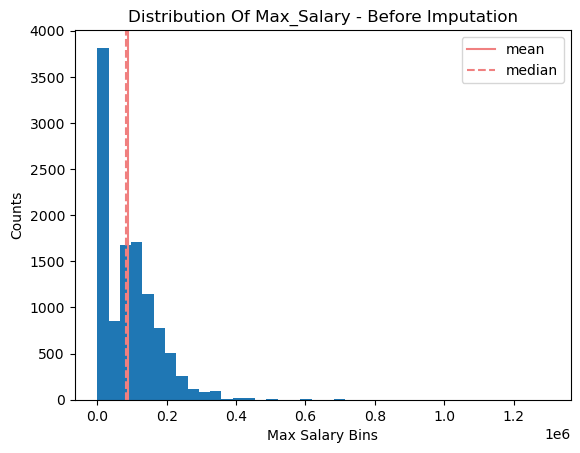

In [85]:
plt.figure()

plt.hist(df['max_salary'], bins=40)
plt.axvline(df['max_salary'].mean(), color="lightcoral", label="mean")
plt.axvline(df['max_salary'].median(), color="lightcoral", linestyle="--", label="median")

plt.title("Distribution of max_salary - before imputation".title())
plt.xlabel("Max Salary Bins")
plt.ylabel("Counts")


plt.legend()
plt.show()

The histogram show that the `max_salary` data is right skewed, which signals that there are some outliers skewing the data. The presence of outliers distorts the mean value, thus we will use median value to fill the missing values.

In [86]:
df['max_salary'] = df['max_salary'].fillna(df['max_salary'].median())
df['max_salary'].isna().sum()

0

In [87]:
# Sanity Check
df.isnull().sum()/df.shape[0]*100

job_id                         0.000000
company_id                     0.000000
title                          0.000000
description                    0.000000
max_salary                     0.000000
med_salary                    93.259339
min_salary                    66.579438
pay_period                     0.000000
formatted_work_type            0.000000
location                       0.000000
applies                       51.158034
original_listed_time           0.000000
remote_allowed                85.556157
views                         22.138002
application_type               0.000000
expiry                         0.000000
formatted_experience_level     0.000000
listed_time                    0.000000
sponsored                      0.000000
reposted                       0.000000
skills_present                 0.000000
application_portal             0.000000
dtype: float64

Null values from `max_salary` column has been filled with median values. We will now take a look at `min_salary`.

In [88]:
df['min_salary'].describe()

count     11111.000000
mean      62650.128421
std       58732.644143
min           7.250000
25%          40.945000
50%       62128.000000
75%      100000.000000
max      800000.000000
Name: min_salary, dtype: float64

In [89]:
df['min_salary'].isna().sum()/df.shape[0]*100

66.57943812789509

Let's create a visualization to observe the distribution of `min_salary` column.

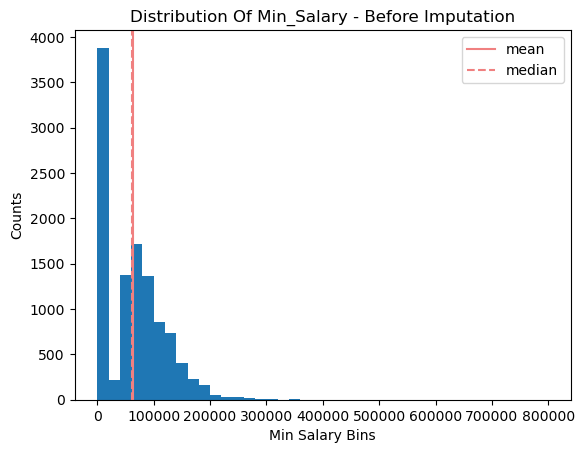

In [90]:
plt.figure()

plt.hist(df['min_salary'], bins=40)
plt.axvline(df['min_salary'].mean(), color="lightcoral", label="mean")
plt.axvline(df['min_salary'].median(), color="lightcoral", linestyle="--", label="median")

plt.title("Distribution of min_salary - before imputation".title())
plt.xlabel("Min Salary Bins")
plt.ylabel("Counts")


plt.legend()
plt.show()

The histogram show that the `min_salary` data is right skewed, which signals that there are some outliers skewing the data. The presence of outliers distorts the mean value, thus we will use median value to fill the missing values.

In [91]:
df['min_salary'] = df['min_salary'].fillna(df['min_salary'].median())
df['min_salary'].isna().sum()

0

In [92]:
df.isnull().sum()/df.shape[0]*100

job_id                         0.000000
company_id                     0.000000
title                          0.000000
description                    0.000000
max_salary                     0.000000
med_salary                    93.259339
min_salary                     0.000000
pay_period                     0.000000
formatted_work_type            0.000000
location                       0.000000
applies                       51.158034
original_listed_time           0.000000
remote_allowed                85.556157
views                         22.138002
application_type               0.000000
expiry                         0.000000
formatted_experience_level     0.000000
listed_time                    0.000000
sponsored                      0.000000
reposted                       0.000000
skills_present                 0.000000
application_portal             0.000000
dtype: float64

Null values from `min_salary` has been filled with median. Finally, we will observe the `med_salary` column and fill the missing values accordingly.

In [93]:
df['med_salary'].describe()

count      2241.000000
mean      32426.170598
std       76860.422528
min           0.000000
25%          18.780000
50%          29.000000
75%       42746.000000
max      998426.000000
Name: med_salary, dtype: float64

In [94]:
df['med_salary'].isna().sum()/df.shape[0]*100

93.25933946940985

Let's create a visualization to observe the distribution of `med_salary` column.

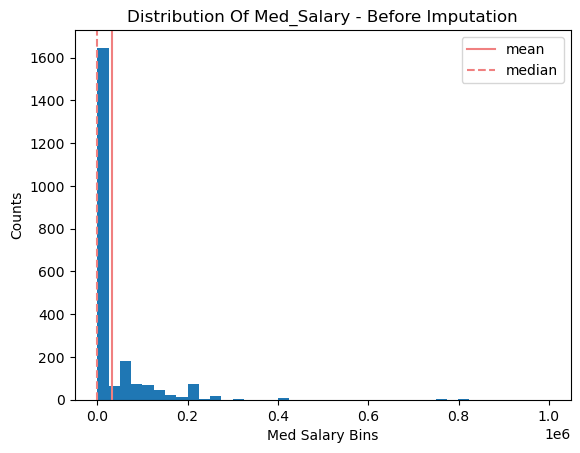

In [95]:
plt.figure()

plt.hist(df['med_salary'], bins=40)
plt.axvline(df['med_salary'].mean(), color="lightcoral", label="mean")
plt.axvline(df['med_salary'].median(), color="lightcoral", linestyle="--", label="median")

plt.title("Distribution of med_salary - before imputation".title())
plt.xlabel("Med Salary Bins")
plt.ylabel("Counts")


plt.legend()
plt.show()

Similar to `min_salary` and `max_salary`, `med_salary` is also heavily right skewed. However, the mean and median values are significantly less than the other two salary columns (median value near 0) due to high volume of missing values from `med_salary` column. Hence, we will impute those missing values using the `min_salary` and `max_salary` values. 

In [96]:
df['med_salary'].fillna((df['min_salary'] + df['max_salary']) / 2, inplace=True)

/var/folders/5d/y_cf75vx4c9dxq1445qbw6pc0000gn/T/ipykernel_46404/868775850.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['med_salary'].fillna((df['min_salary'] + df['max_salary']) / 2, inplace=True)


In [97]:
df.sample(50)

job_id  company_id  \
31141  3693050833      3556.0   
6727   3757460053    153293.0   
9221   3756134472  96642179.0   
20378  3701164045  90518804.0   
3532   3757701715     21337.0   
7521   3757445983  15599730.0   
33234  1004740969    882349.0   
2524   3757731650    808034.0   
5771   3757473814     24765.0   
5876   3757471326   1264953.0   
25719  3696993898     26923.0   
6721   3757460071    166572.0   
12892  3755575444     77097.0   
23505  3697397451    165422.0   
19195  3701312535     39189.0   
1230   3757751220   3706049.0   
12599  3755579670     11758.0   
22221  3699084958  18527534.0   
21401  3699410368      2251.0   
4761   3757488984     12446.0   
21281  3699413152   3159554.0   
30712  3693053152     11229.0   
33134  3635154108   2144424.0   
31875  3693047625   2532635.0   
27595  3693597505   2382910.0   
6389   3757463900  33313988.0   
7101   3757453906   1945473.0   
928    3757768475     24494.0   
13305  3755551932  14542824.0   
4410   3757491758     11056.0   
17112  3748838969   2689946.0   
2108   3757736252     23379.0   
1023   3757758001   5034592.0   
12225  3755583480     18691.0   
32094  3693046563    118698.0   
26972  3694104220  86694680.0   
4335   3757492257      7425.0   
30034  3693064835   7972561.0   
21726  3699401386  14542824.0   
15764  3749350169    612493.0   
10201  3756109809   2014725.0   
23450  3697398617     37768.0   
14817  3749367221    108340.0   
2055   3757736780      2995.0   
19785  3701303007   2396310.0   
22899  3699061258      2162.0   
21722  3699401415    383000.0   
21237  3699414693   2524729.0   
30020  3693064892  18506580.0   
10569  3756104949  64639449.0   

                                                   title  \
31141  Assistant Professor, Questrom School of Busine...   
6727                      Electrical Engineering Manager   
9221                            Fire Protection Engineer   
20378                              Mortgage Loan Officer   
3532   Community Health Worker - Special Population (...   
7521                             Chief Financial Officer   
33234                                     Civil Engineer   
2524   Travel - Telemetry - Nurse Job - $2447/wk - $2...   
5771                Program Manager Business Development   
5876                                   Senior Accountant   
25719                                  Team Member (CSR)   
6721                             Seasonal Beauty Advisor   
12892                         Desktop Support Technician   
23505                    Sterile Processing Technician I   
19195                                Buyer III #23-05041   
1230                     Registered Nurse - RN - LTC/SNF   
12599                         Field Inventory Technician   
22221                            Chief Financial Officer   
21401                 Selling Associate-Twelve Oaks Mall   
4761   Lead Customer Service Representative, Full or ...   
21281                                 Content Strategist   
30712  Fixed Asset Accountant PAID PARKING DOWNTOWN (...   
33134                          Team Lead- Fashion Island   
31875                        Commercial Property Manager   
27595             Wireless Security TPM III, SPEAR WiSec   
6389                                Creative Coordinator   
7101                                         Med/Surg RN   
928    Registered EEG Technician - $10,000 Sign-On Bonus   
13305                             Intensive Care Unit RN   
4410                          Account Manager/Recruiter    
17112                                 Manual QA Engineer   
2108   Director Nursing Professional Development & Cl...   
1023   Behavior Specialists (Free College + Paid Trai...   
12225                              Dietitian- Pediatrics   
32094                              Laboratory Supervisor   
26972                               Dscout UX Researcher   
4335                               TIG WELDER- 2nd SHIFT   
30034                   Clinical Sales Manager 

In [98]:
df['med_salary'].describe()

count    3.324600e+04
mean     7.119402e+04
std      4.724055e+04
min      0.000000e+00
25%      7.302800e+04
50%      7.302800e+04
75%      7.302800e+04
max      1.050000e+06
Name: med_salary, dtype: float64

The updated mean and median of `med_salary` column seem more realistic than the original version. Although there are some outliers affecting the data, we will use this updated version moving forward as our main salary data. Hence, we will drop the min and max salary data to avoid redundancy in data.

In [99]:
df.drop(columns=['max_salary'], inplace=True)

In [100]:
df.drop(columns=['min_salary'], inplace=True)

# Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   job_id                      33246 non-null  int64         
 1   company_id                  33246 non-null  float64       
 2   title                       33246 non-null  object        
 3   description                 33246 non-null  object        
 4   med_salary                  33246 non-null  float64       
 5   pay_period                  33246 non-null  object        
 6   formatted_work_type         33246 non-null  object        
 7   location                    33246 non-null  object        
 8   applies                     16238 non-null  float64       
 9   original_listed_time        33246 non-null  datetime64[ns]
 10  remote_allowed              4802 non-null   float64       
 11  views                       25886 non-null  float64   

#### Applies

In [101]:
df['applies'].isna().sum()

17008

In [102]:
df['applies'].isna().sum()/df.shape[0]

0.5115803404920892

In [103]:
df['applies'].value_counts()

applies
1.0       3706
2.0       1954
3.0       1262
4.0        970
5.0        729
6.0        587
7.0        498
8.0        413
9.0        384
10.0       340
11.0       340
12.0       294
13.0       259
14.0       215
15.0       213
16.0       189
17.0       172
18.0       153
19.0       144
20.0       127
21.0       116
22.0       108
51.0       104
24.0       102
23.0       101
26.0        88
25.0        86
28.0        84
27.0        83
31.0        80
29.0        73
30.0        67
32.0        60
34.0        58
52.0        54
35.0        54
33.0        52
36.0        48
44.0        46
38.0        44
42.0        43
41.0        43
43.0        41
46.0        41
55.0        40
40.0        39
48.0        38
53.0        37
39.0        37
45.0        36
49.0        35
37.0        34
54.0        31
47.0        28
50.0        28
65.0        26
56.0        24
67.0        23
69.0        23
71.0        22
60.0        21
82.0        20
68.0        20
66.0        19
59.0        19
61.0        19
64

In [104]:
df['applies'].describe()

count    16238.000000
mean        18.895246
std         49.059029
min          1.000000
25%          2.000000
50%          5.000000
75%         16.000000
max       1615.000000
Name: applies, dtype: float64

Let's create a visualization to observe the distribution of `applies` column.

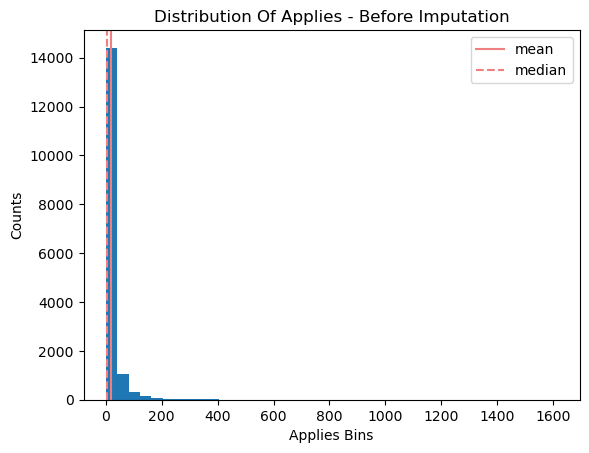

In [105]:
plt.figure()

plt.hist(df['applies'], bins=40)
plt.axvline(df['applies'].mean(), color="lightcoral", label="mean")
plt.axvline(df['applies'].median(), color="lightcoral", linestyle="--", label="median")

plt.title("Distribution of applies - before imputation".title())
plt.xlabel("Applies Bins")
plt.ylabel("Counts")


plt.legend()
plt.show()

The histogram show that the `applies` data is heavily right skewed, which signals that there are some outliers skewing the data. The presence of outliers distorts the mean value, thus we will use median value to fill the missing values.

In [106]:
df['applies'] = df['applies'].fillna(df['applies'].median())

In [107]:
df['applies'].isna().sum()

0

#### Views

In [108]:
df['views'].isna().sum()

7360

In [109]:
df['views'].isna().sum()/df.shape[0]*100

22.138001564097937

In [110]:
df['views'].describe()

count    25886.000000
mean        58.339875
std        141.253774
min          1.000000
25%          4.000000
50%         16.000000
75%         54.000000
max       5656.000000
Name: views, dtype: float64

In [111]:
df['views'].value_counts()

views
1.0       2850
2.0       1839
3.0       1364
4.0       1030
5.0        874
6.0        744
7.0        645
8.0        578
9.0        543
10.0       438
11.0       437
14.0       401
12.0       365
16.0       360
13.0       355
15.0       329
17.0       317
18.0       301
19.0       289
20.0       277
22.0       258
21.0       254
25.0       227
23.0       225
24.0       223
26.0       211
30.0       183
28.0       180
27.0       178
31.0       172
29.0       166
32.0       164
33.0       157
34.0       157
35.0       150
38.0       149
39.0       143
37.0       143
41.0       141
40.0       140
36.0       137
44.0       129
43.0       122
45.0       120
50.0       116
42.0       111
49.0       110
52.0       104
47.0       100
56.0        99
54.0        96
58.0        95
48.0        90
46.0        88
55.0        88
51.0        88
57.0        87
61.0        85
53.0        83
60.0        82
59.0        79
62.0        79
71.0        69
65.0        68
63.0        67
69.0        67
78.0

Let's create a visualization to observe the distribution of `views` column.

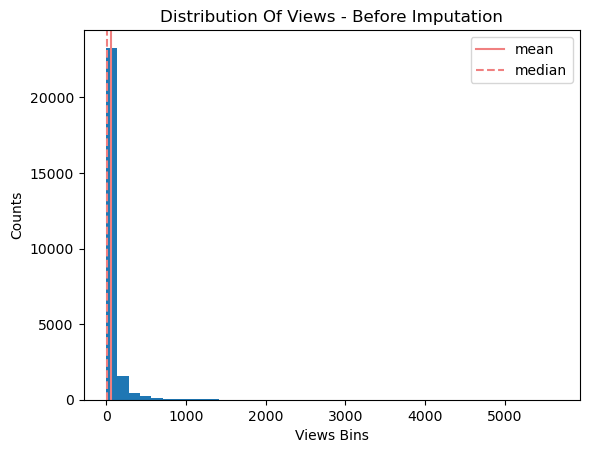

In [112]:
plt.figure()

plt.hist(df['views'], bins=40)
plt.axvline(df['views'].mean(), color="lightcoral", label="mean")
plt.axvline(df['views'].median(), color="lightcoral", linestyle="--", label="median")

plt.title("Distribution of views - before imputation".title())
plt.xlabel("Views Bins")
plt.ylabel("Counts")


plt.legend()
plt.show()

The histogram show that the `views` data is heavily right skewed, which signals that there are some outliers skewing the data. The presence of outliers distorts the mean value, thus we will use median value to fill the missing values.

In [113]:
df['views'] = df['views'].fillna(df['views'].median())

In [114]:
df['views'].isna().sum()

0

#### Remote Allowed

In [115]:
df['remote_allowed'].describe()

count    4802.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: remote_allowed, dtype: float64

In [116]:
df['remote_allowed'].value_counts()

remote_allowed
1.0    4802
Name: count, dtype: int64

The dataset only contains the response of '1'. This is likely due to an error in the data collection process. For instance, the data may have been encoded in a way that only captures instances where remote work is allowed, and other scenarios (where remote work is not allowed) are not explicitly represented in the dataset. 

In [117]:
df['remote_allowed'].isna().sum()/df.shape[0]*100

85.55615713168501

To fill in the null values, we will convert this variable into a binary column (0 and 1). Here, we are making an assumption that '0' will represent the missing values (remote-working not allowed), and '1' will be remote working allowed responses. We can simply fill the missing values in with 0s to achieve this.

In [118]:
# Fill in the missing values with the entries of '0'
df['remote_allowed'] = df['remote_allowed'].fillna(0)
df['remote_allowed'].isna().sum()

0

In [119]:
# Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   job_id                      33246 non-null  int64         
 1   company_id                  33246 non-null  float64       
 2   title                       33246 non-null  object        
 3   description                 33246 non-null  object        
 4   med_salary                  33246 non-null  float64       
 5   pay_period                  33246 non-null  object        
 6   formatted_work_type         33246 non-null  object        
 7   location                    33246 non-null  object        
 8   applies                     33246 non-null  float64       
 9   original_listed_time        33246 non-null  datetime64[ns]
 10  remote_allowed              33246 non-null  float64       
 11  views                       33246 non-null  float64   

We have completed all the data cleaning processes by filling in the null values. Now we will plot some graphs to analyze any patterns that may occur to address our question of interest: "Is there any relationships between the `views` column and other job attributes within the `job_postings` dataset?"

<a id = 'EDA'><a/>   
## Preliminary EDA
    
---

We will begin by creating some visualizations to depict any relationships between the `views` column and other variables. Our goal is to see if there are any patterns within the dataset to analyze the job trends regarding the `views` column. We will begin by looking at various distributions of variables and their counts.

In [120]:
df.shape

(33246, 20)

We will separate the variables according to their data types, 'numerical' vs 'categorical'.

In [121]:
df.select_dtypes(["float", "int"]).columns

Index(['job_id', 'company_id', 'med_salary', 'applies', 'remote_allowed',
       'views', 'sponsored', 'reposted', 'skills_present',
       'application_portal'],
      dtype='object')

In [122]:
df.select_dtypes(["object"]).columns

Index(['title', 'description', 'pay_period', 'formatted_work_type', 'location',
       'application_type', 'formatted_experience_level'],
      dtype='object')

We will also check for the datetime columns within the dataset.

In [123]:
df.select_dtypes(["datetime"]).columns

Index(['original_listed_time', 'expiry', 'listed_time'], dtype='object')

For visualization, we will group variables into their respective data types. For numerical column, we will include all the 'int' and 'float' variables except 'job_id' and 'company_id'. This is because these columns contain unique values for labelling purposes, insignificant to our analysis.

In [124]:
numerical_cols=['med_salary','applies', 'remote_allowed', 'views', 
               'sponsored', 'reposted', 'skills_present', 'application_portal']

In 'object' data types, we will leave out 'title', 'description' and 'location' columns as these categorical columns need further investigation and cleaning.

In [125]:
categorical_cols=['pay_period', 'formatted_work_type',
       'application_type', 'formatted_experience_level']

In [126]:
datetime_cols=['original_listed_time', 'expiry', 'listed_time']

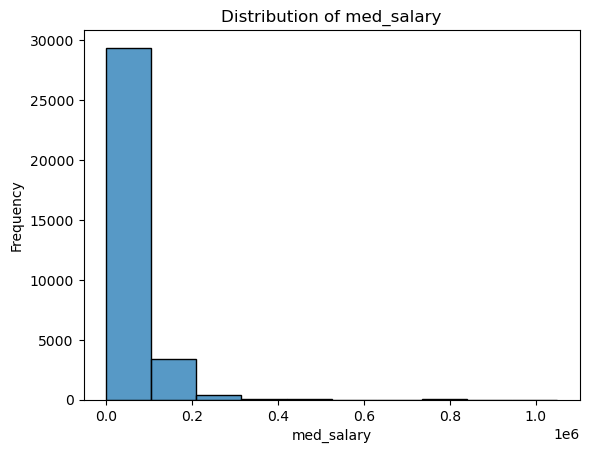

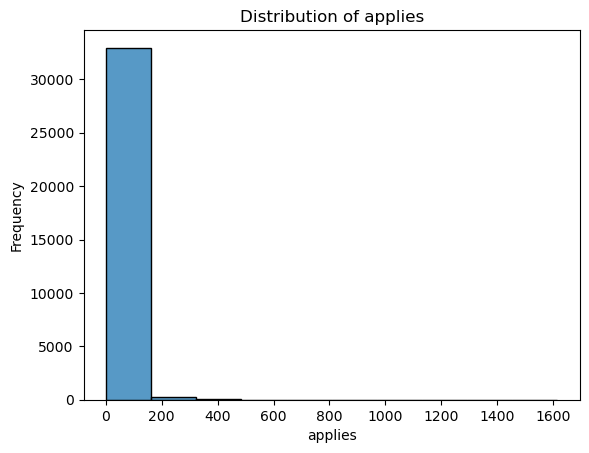

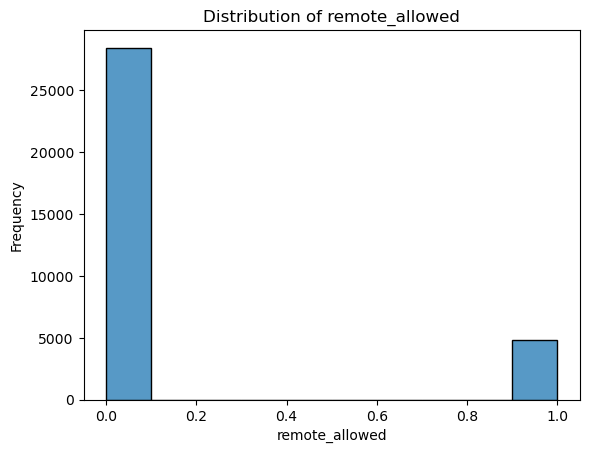

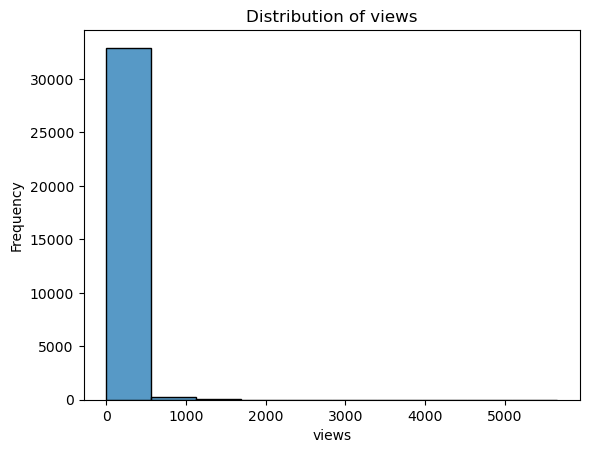

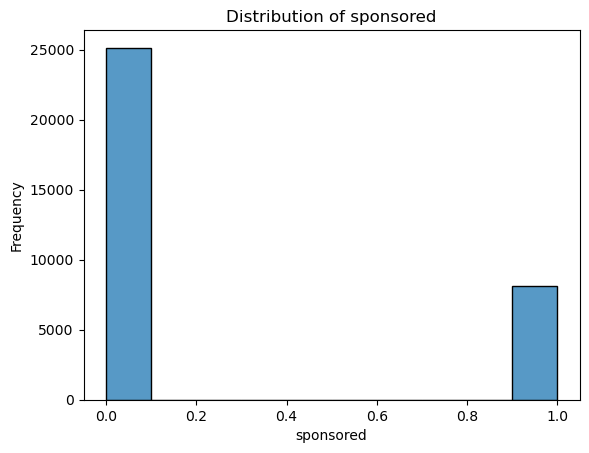

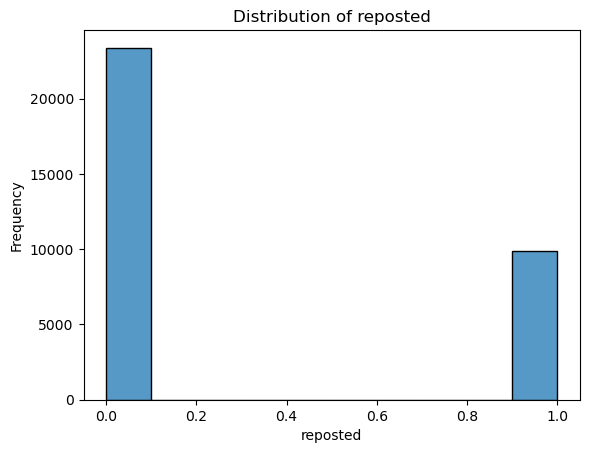

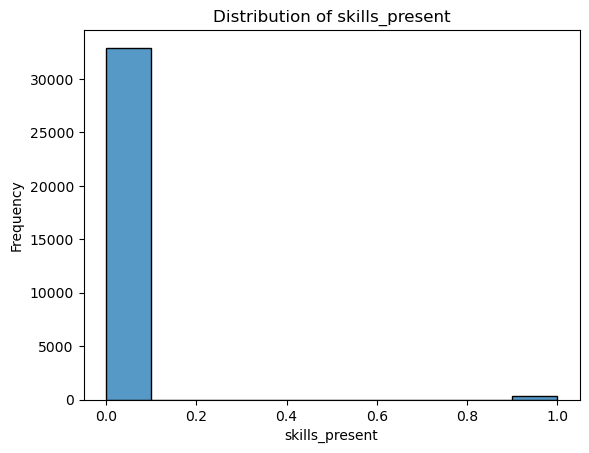

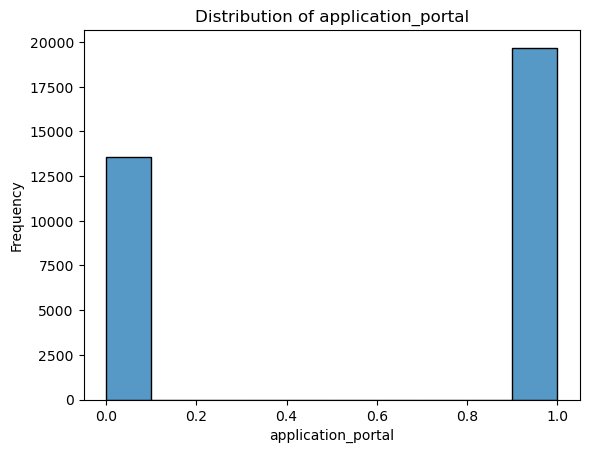

In [128]:
# Visualizations for numeric data
for col in numerical_cols:
    sns.histplot(data=df, x=col, bins=10)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

It's hard to understand non-binary columns like `med_salary`, `applies` and `views` by just looking at these bar graphs, hence we will plot these variables individually to gain some better insights.

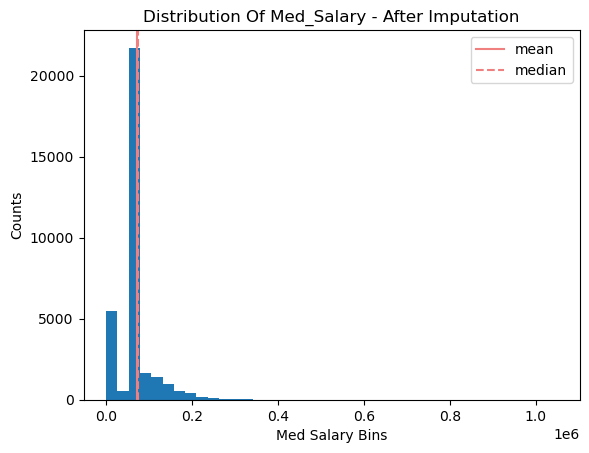

In [129]:
plt.figure()

plt.hist(df['med_salary'], bins=40)
plt.axvline(df['med_salary'].mean(), color="lightcoral", label="mean")
plt.axvline(df['med_salary'].median(), color="lightcoral", linestyle="--", label="median")

plt.title("Distribution of med_salary - after imputation".title())
plt.xlabel("Med Salary Bins")
plt.ylabel("Counts")


plt.legend()
plt.show()

In [130]:
df['med_salary'].describe()

count    3.324600e+04
mean     7.119402e+04
std      4.724055e+04
min      0.000000e+00
25%      7.302800e+04
50%      7.302800e+04
75%      7.302800e+04
max      1.050000e+06
Name: med_salary, dtype: float64

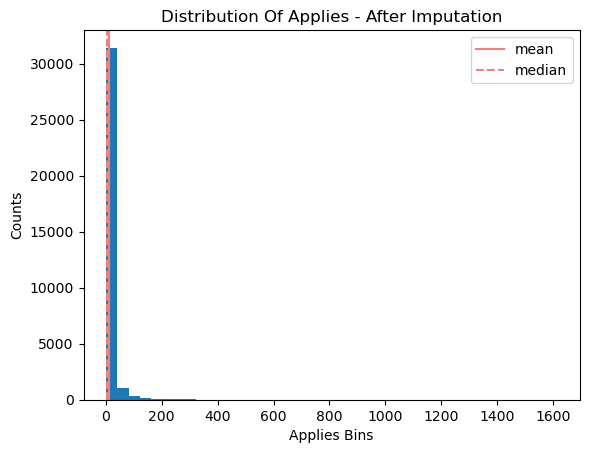

In [131]:
plt.figure()

plt.hist(df['applies'], bins=40)
plt.axvline(df['applies'].mean(), color="lightcoral", label="mean")
plt.axvline(df['applies'].median(), color="lightcoral", linestyle="--", label="median")

plt.title("Distribution of applies - after imputation".title())
plt.xlabel("Applies Bins")
plt.ylabel("Counts")


plt.legend()
plt.show()

In [132]:
df['applies'].describe()

count    33246.000000
mean        11.786711
std         34.981863
min          1.000000
25%          5.000000
50%          5.000000
75%          5.000000
max       1615.000000
Name: applies, dtype: float64

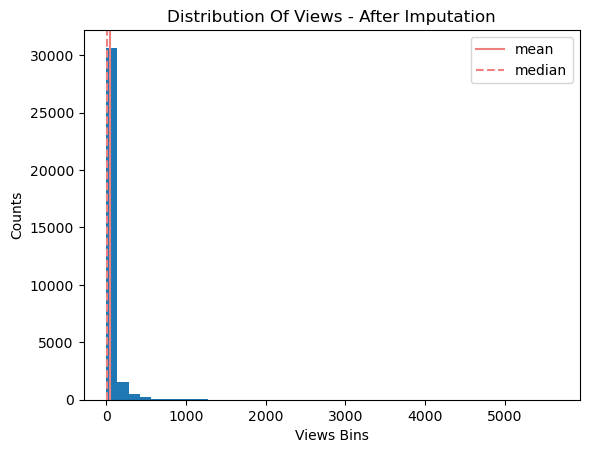

In [133]:
plt.figure()

plt.hist(df['views'], bins=40)
plt.axvline(df['views'].mean(), color="lightcoral", label="mean")
plt.axvline(df['views'].median(), color="lightcoral", linestyle="--", label="median")

plt.title("Distribution of views - after imputation".title())
plt.xlabel("Views Bins")
plt.ylabel("Counts")


plt.legend()
plt.show()

In [134]:
df['views'].describe()

count    33246.000000
mean        48.966673
std        125.874522
min          1.000000
25%          6.000000
50%         16.000000
75%         38.000000
max       5656.000000
Name: views, dtype: float64

Analysis:
- med_salary, applies, and views are all heavily right skewed, indication of some extreme values (outliers) within the dataset.
- The average median salary is around 70k.
- On average, each job post receives about 12 applications.
- On average, each job posting gets approximately 49 views.
- Majority of the companies do not allow remote working.
- Only 1/4 of the companies promote their job postings (sponsored).
- Only 30 percent of the companies repost their job postings.
- Majority of the companies do not include skills description within their job postings.
- Roughly 60 percent of the job applicants apply through LinkedIn directly.

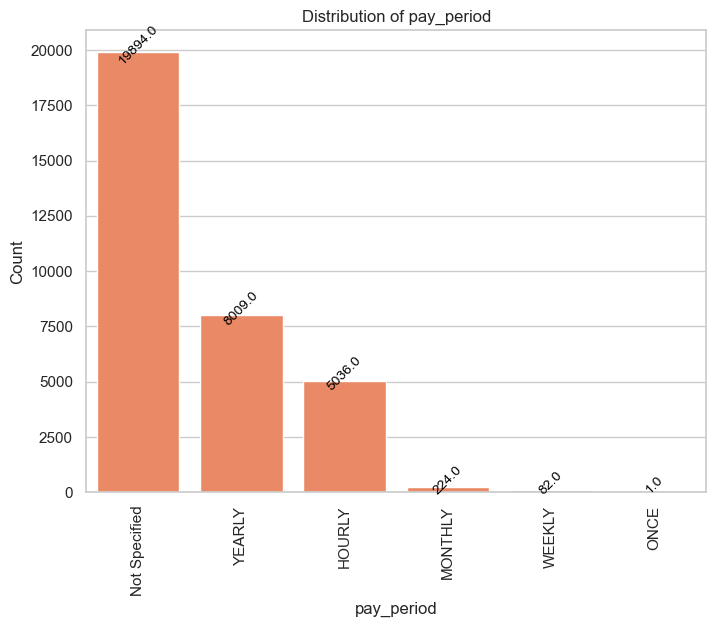

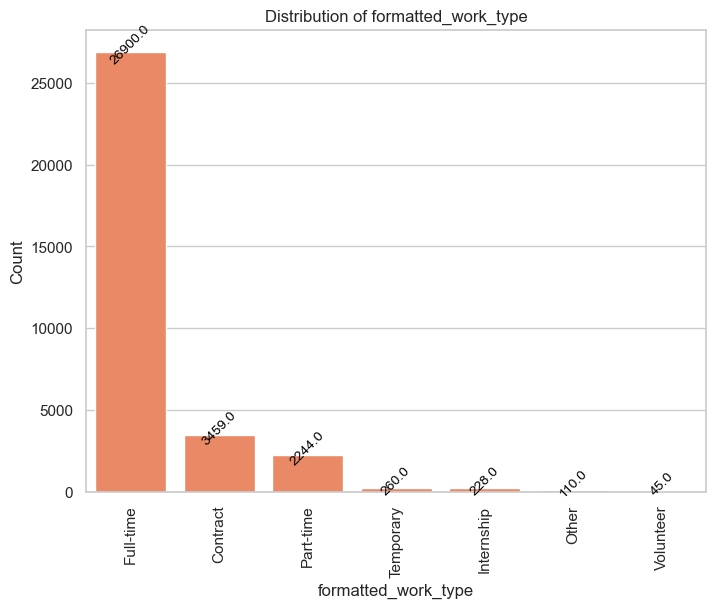

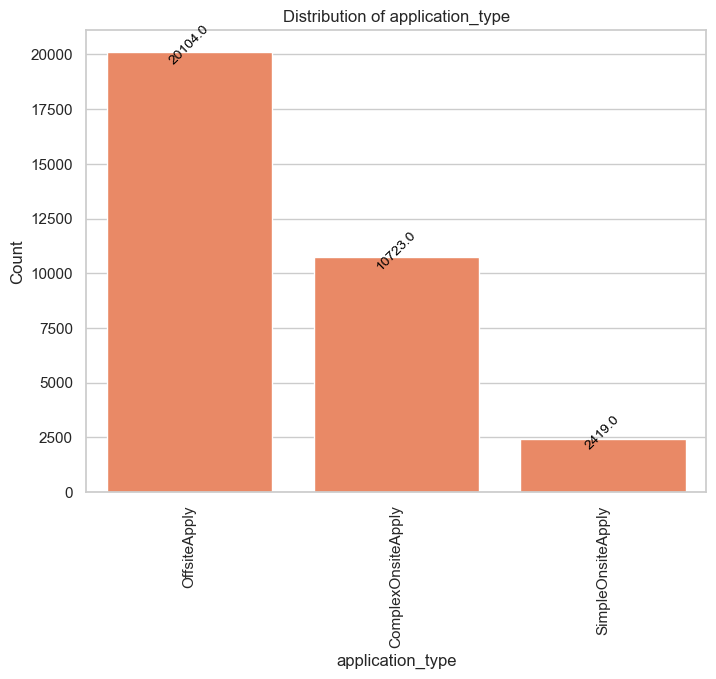

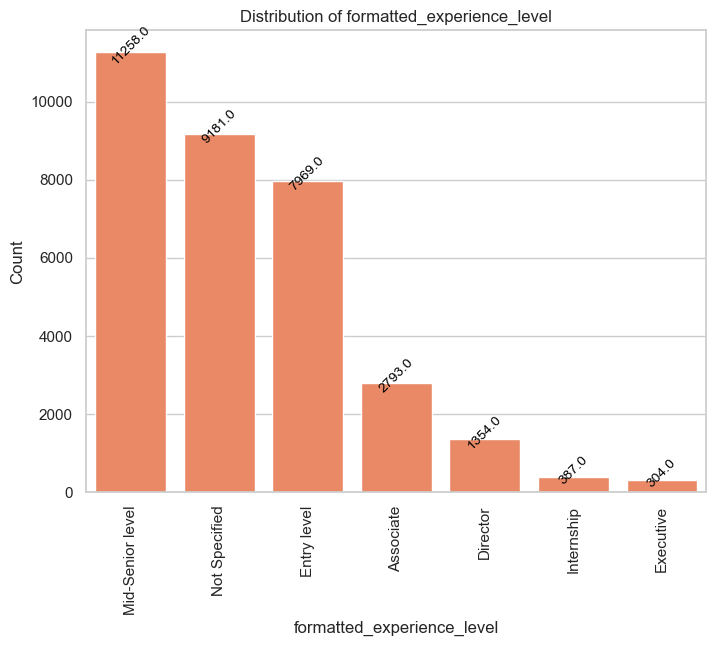

In [136]:
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index,color='coral')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # Adding count labels above the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points', rotation=45)
    
    plt.xticks(rotation=90)
    plt.show()

Analysis:
- Yearly pay period option seems to be the most popular, followed by hourly and monthly. This may be due to the work type. For instance, with more full-time positions available in the market, the higher chance of pay period being yearly (salary), instead of hourly which is more associated with part time jobs.
- Correspondingly, full time positions were the most demanded work type, followed by contract and part time.
- Roughly 60 percent of the job applications are submitted through various online platforms.
- Companies are in need for mid-senior level talents to fill in the vancancies. Entry level and associate positions seem to be in demand as well, but not as much as experienced workers that are considered to be in mid-senior level.

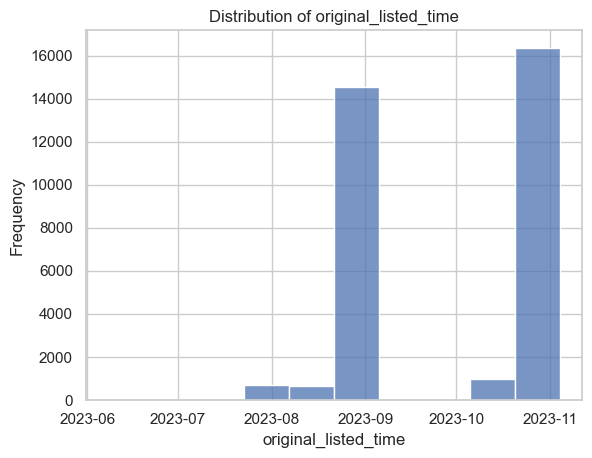

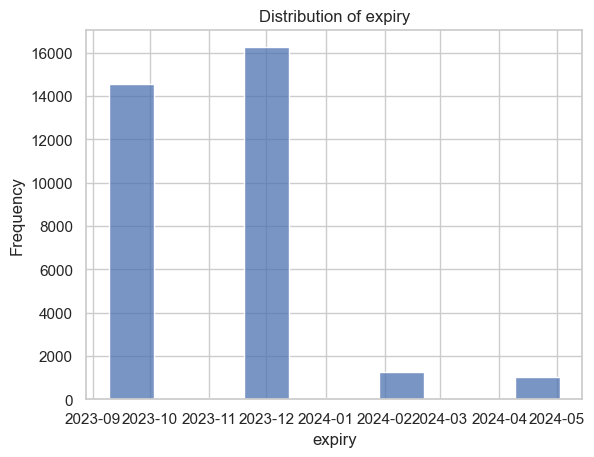

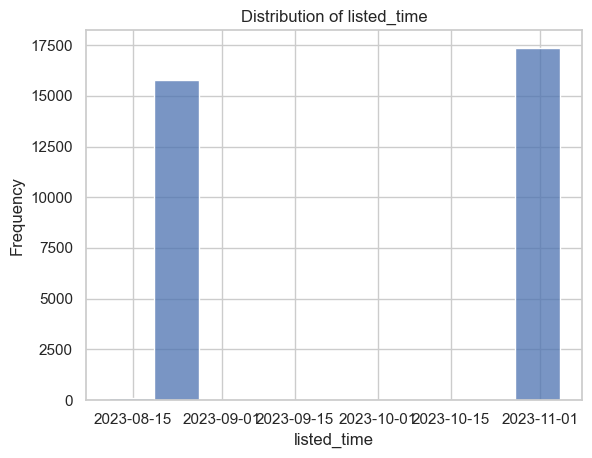

In [138]:
for col in datetime_cols:
    sns.histplot(data=df, x=col, bins=10)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

The distribution of datetime variables display that the majority of the job were posted in September and November of 2023, followed by the expiration in October and December. From this, we can assume that most of the job post duration is a month. Unfortunately, since we have limited access to the time information since the data only consists of 2 periods of job listed time, we will not be able to conduct time analysis for more in-depth analysis.

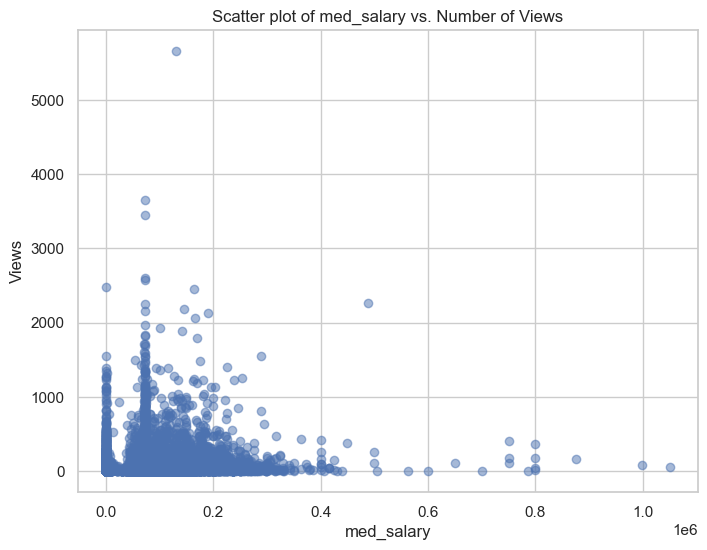

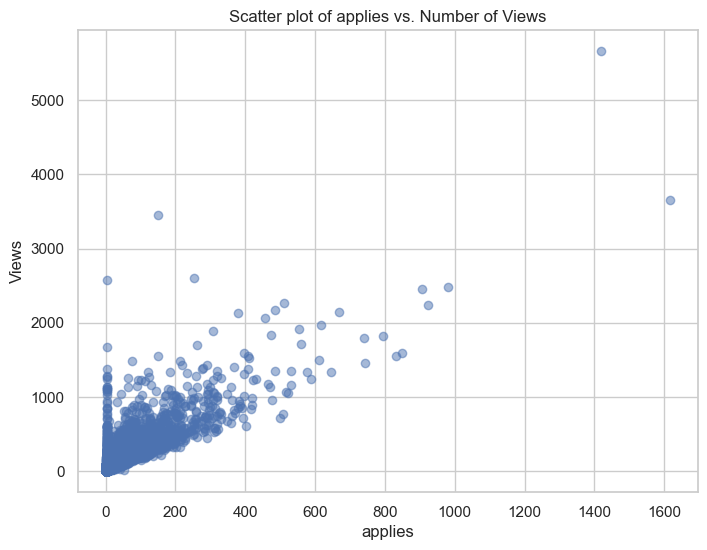

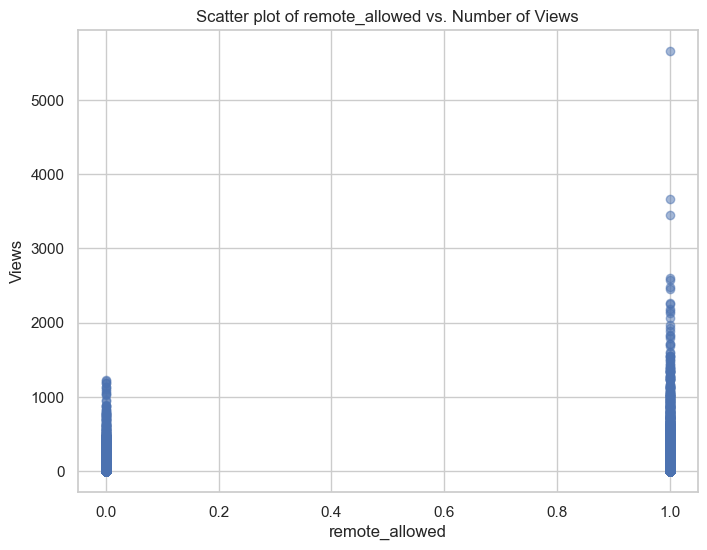

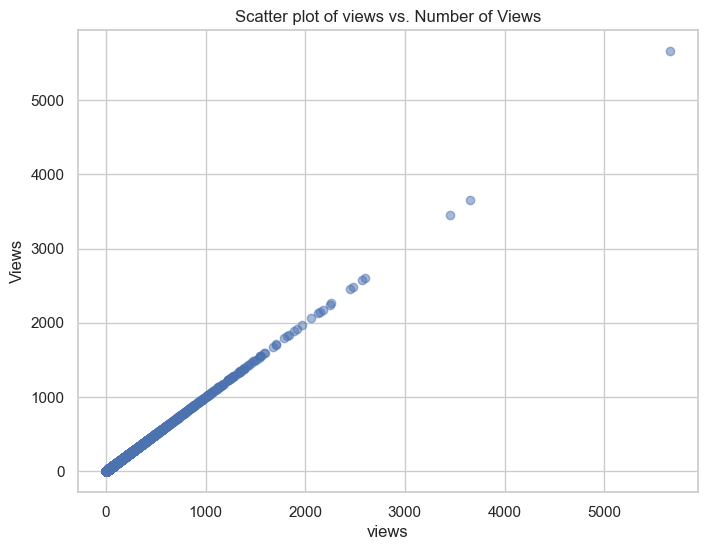

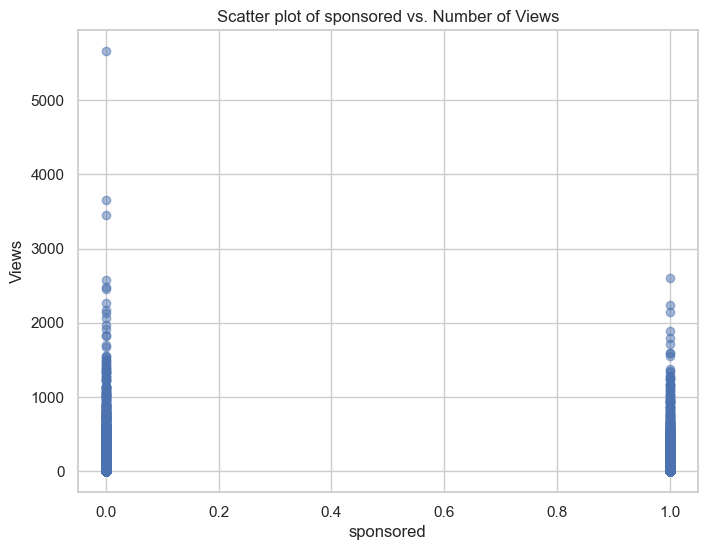

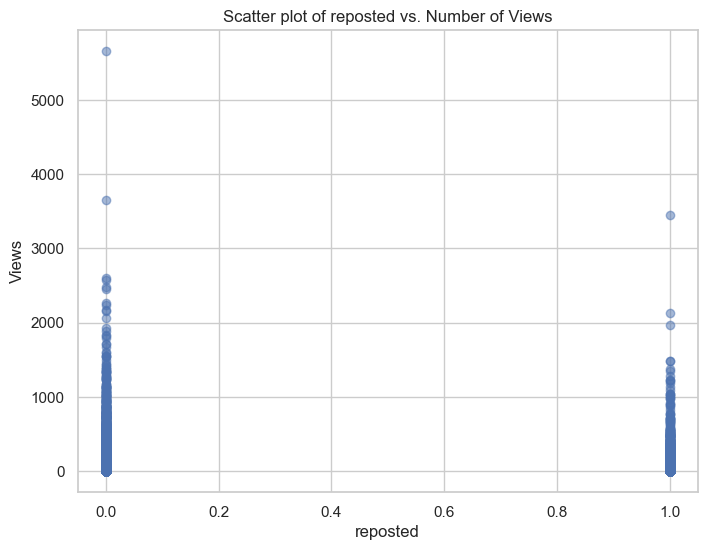

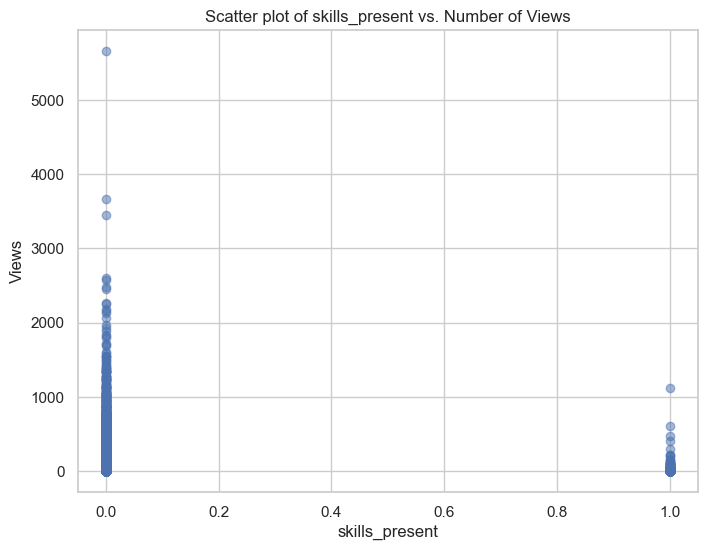

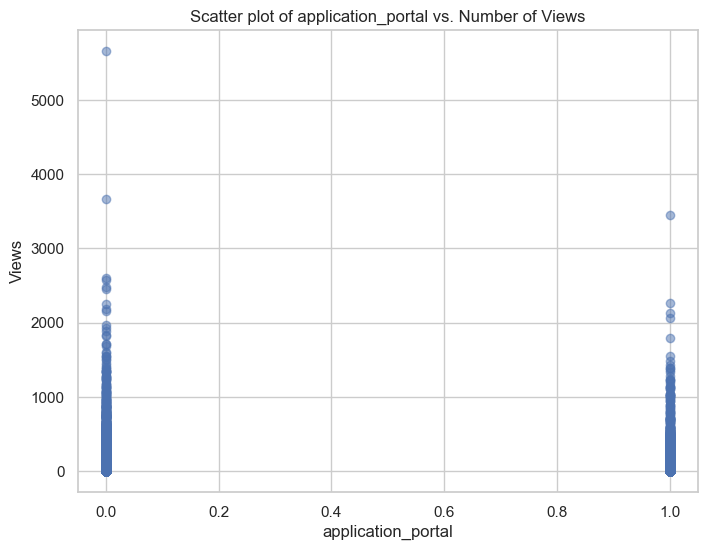

In [139]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[col], df['views'], alpha=0.5)
    plt.title(f'Scatter plot of {col} vs. Number of Views')
    plt.xlabel(col)
    plt.ylabel('Views')
    plt.grid(True)
    plt.show()

Analysis:
- There is a weak positive relationship between median salary and number of views.
- There is a moderately positive relationship between number of applications submitted and number of views.

/var/folders/5d/y_cf75vx4c9dxq1445qbw6pc0000gn/T/ipykernel_46404/2173964818.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='views', data=sorted_df, ci=None)


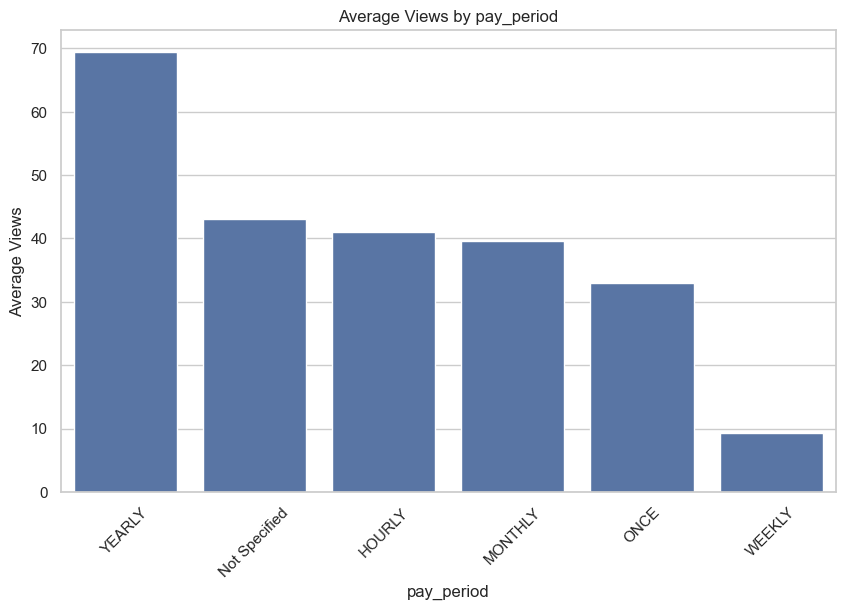

/var/folders/5d/y_cf75vx4c9dxq1445qbw6pc0000gn/T/ipykernel_46404/2173964818.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='views', data=sorted_df, ci=None)


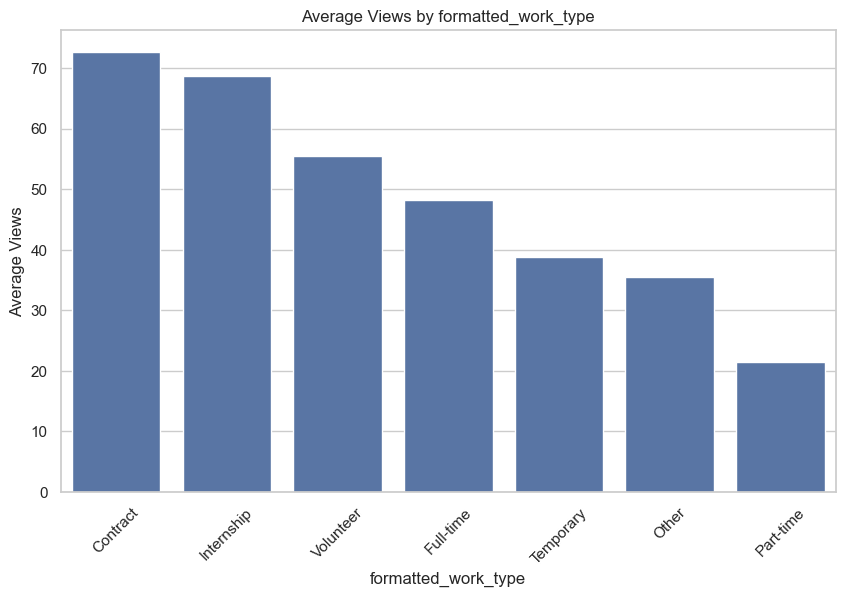

/var/folders/5d/y_cf75vx4c9dxq1445qbw6pc0000gn/T/ipykernel_46404/2173964818.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='views', data=sorted_df, ci=None)


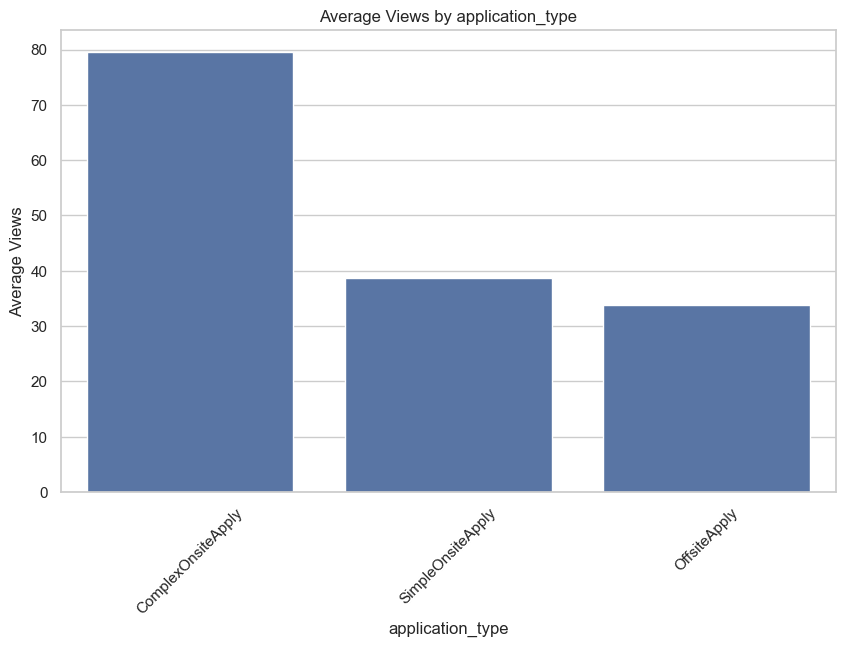

/var/folders/5d/y_cf75vx4c9dxq1445qbw6pc0000gn/T/ipykernel_46404/2173964818.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='views', data=sorted_df, ci=None)


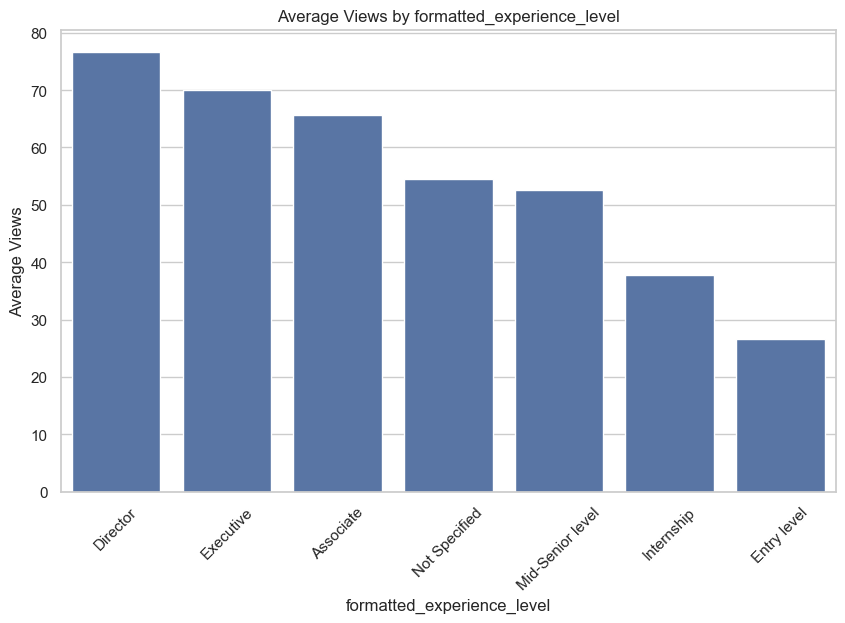

In [143]:
for col in categorical_cols:
    # Calculate mean views per category and sort them in descending order
    sorted_df = df.groupby(col)['views'].mean().reset_index()
    sorted_df = sorted_df.sort_values('views', ascending=False)
    
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=col, y='views', data=sorted_df, ci=None)
    plt.title(f'Average Views by {col}')
    plt.xlabel(col)
    plt.ylabel('Average Views')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()

Analysis: 
- Yearly pay period recorded the highest number of views on average, followed by Not Specified, Hourly, and Monthly. This suggests that most of the companies prefer to list their compensation information in yearly salary format.
- The most popular work type seems to be contract and internship as the two categories recorded high number of views. This reflects job applicants' preference as they seem to opt for short-term positions, instead of full-time, long-term positions. There could be several reasons leading to this phenomenon, such as seasonality.
- Onsite applying methods seem to be more popular than offsite (online) applying methods, such as job fair, networking events and more. Further investigation is needed to study this behaviour.
- Lastly, higher level positions seem to be in demand, such as director and executive. This trend aligns with the trend observed in the pay_period section where the yearly payment was the most popular option. On the other hand, lower level positions like entry level and internship roles seem to be relatively less popular. The above trends reflect the job market trends at the time data was collected.

In [144]:
# Check data types of DataFrame columns
data_types = df.dtypes

# Filter columns with object data type
string_columns = data_types[data_types == 'object'].index.tolist()

# Check for string values in each column
for column in string_columns:
    unique_values = df[column].unique()
    if len(unique_values) <= 10:  
        print(f"Unique values in column '{column}': {unique_values}")
    else:
        print(f"Column '{column}' contains many unique values.")


Column 'title' contains many unique values.
Column 'description' contains many unique values.
Unique values in column 'pay_period': ['MONTHLY' 'Not Specified' 'HOURLY' 'YEARLY' 'WEEKLY' 'ONCE']
Unique values in column 'formatted_work_type': ['Full-time' 'Contract' 'Other' 'Part-time' 'Volunteer' 'Temporary'
 'Internship']
Column 'location' contains many unique values.
Unique values in column 'application_type': ['OffsiteApply' 'SimpleOnsiteApply' 'ComplexOnsiteApply']
Unique values in column 'formatted_experience_level': ['Entry level' 'Not Specified' 'Mid-Senior level' 'Director' 'Associate'
 'Executive' 'Internship']


We have 7 categorical columns in the dataset. In the next notebook where we conduct our advanced EDA, we will use feature engineering to convert these categorical variables into numerical variables to create a heatmap to observe the correlations among different job attributes.

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   job_id                      33246 non-null  int64         
 1   company_id                  33246 non-null  float64       
 2   title                       33246 non-null  object        
 3   description                 33246 non-null  object        
 4   med_salary                  33246 non-null  float64       
 5   pay_period                  33246 non-null  object        
 6   formatted_work_type         33246 non-null  object        
 7   location                    33246 non-null  object        
 8   applies                     33246 non-null  float64       
 9   original_listed_time        33246 non-null  datetime64[ns]
 10  remote_allowed              33246 non-null  float64       
 11  views                       33246 non-null  float64   

The preliminary EDA has been completed. Now we will save the cleaned data and conduct further analysis in a new notebook using the cleaned dataset.

In [ ]:
# Save the DataFrame to a CSV file in the 'Data' folder
df.to_csv("../Data/clean_linkedin_job_posting.csv", index=False)

<a id = 'Summary'><a/>   
## Summary
    
---

In this notebook, we performed an analysis of a job posting dataset from LinkedIn, focusing on the `views` variable. The preliminary analysis included data loading, data cleaning, and basic & advanced EDA with visualization. Through experimentation, we were able to see the impacts of various job posting features, such as the experience level, number of applications submitted, median salary and more. The basic EDA analysis culminated in visualizations and insights aimed at understanding the job market trends, with an emphasis on number of views. This notebook continues to "Part_Two_LinkedIn_Advanced_EDA_and_Modeling.ipynb" notebook.